Data Extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as   np
import pandas as  pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


KeyboardInterrupt: 

In [ ]:
#data=pd.read_csv(r"C:\Users\scmouli\OneDrive\Desktop\Python\Forest Fire Project\forestfires.csv")
data=pd.read_csv(r"C:\Users\Ravi krishnan A.M\Downloads\forest+fires\forestfires.csv")
data.head(5)
data.tail(5)


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

In [201]:
data.shape

(517, 13)

Descriptive Statistics

In [203]:

# Summary statistics
summary_stats = data.describe()
print(summary_stats, '\n')

# Frequency distribution of a categorical variables (i.e. day, month)
freq_disb_day = data['day'].value_counts()
freq_disb_month = data['month'].value_counts()
print('\n', freq_disb_day)
print('\n', freq_disb_month)


                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

Data Preprocessing 

In [205]:
# NO null values to drop 
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [206]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Perform the encoding on 'month' and 'day' columns
encoded_data = encoder.fit_transform(data[['month', 'day']])

# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['month', 'day']))

# Concatenate the original DataFrame (excluding 'month' and 'day' columns) with the encoded DataFrame
df_encoded = pd.concat([data.drop(columns=['month', 'day']).reset_index(drop=True), encoded_df], axis=1)

df_encoded.head(5)

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...        0.0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...        0.0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...        0.0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...        0.0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...        0.0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0        0.0        0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1        1.0        0.0      0.0      0.0      0.0      0.0      0.0      1.0   
2        1.0        0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3        0.0        0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4        0.0        0.0      0.0      0.0      0.0      1.0      0.0      0.0   

   day_wed  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 30 columns]

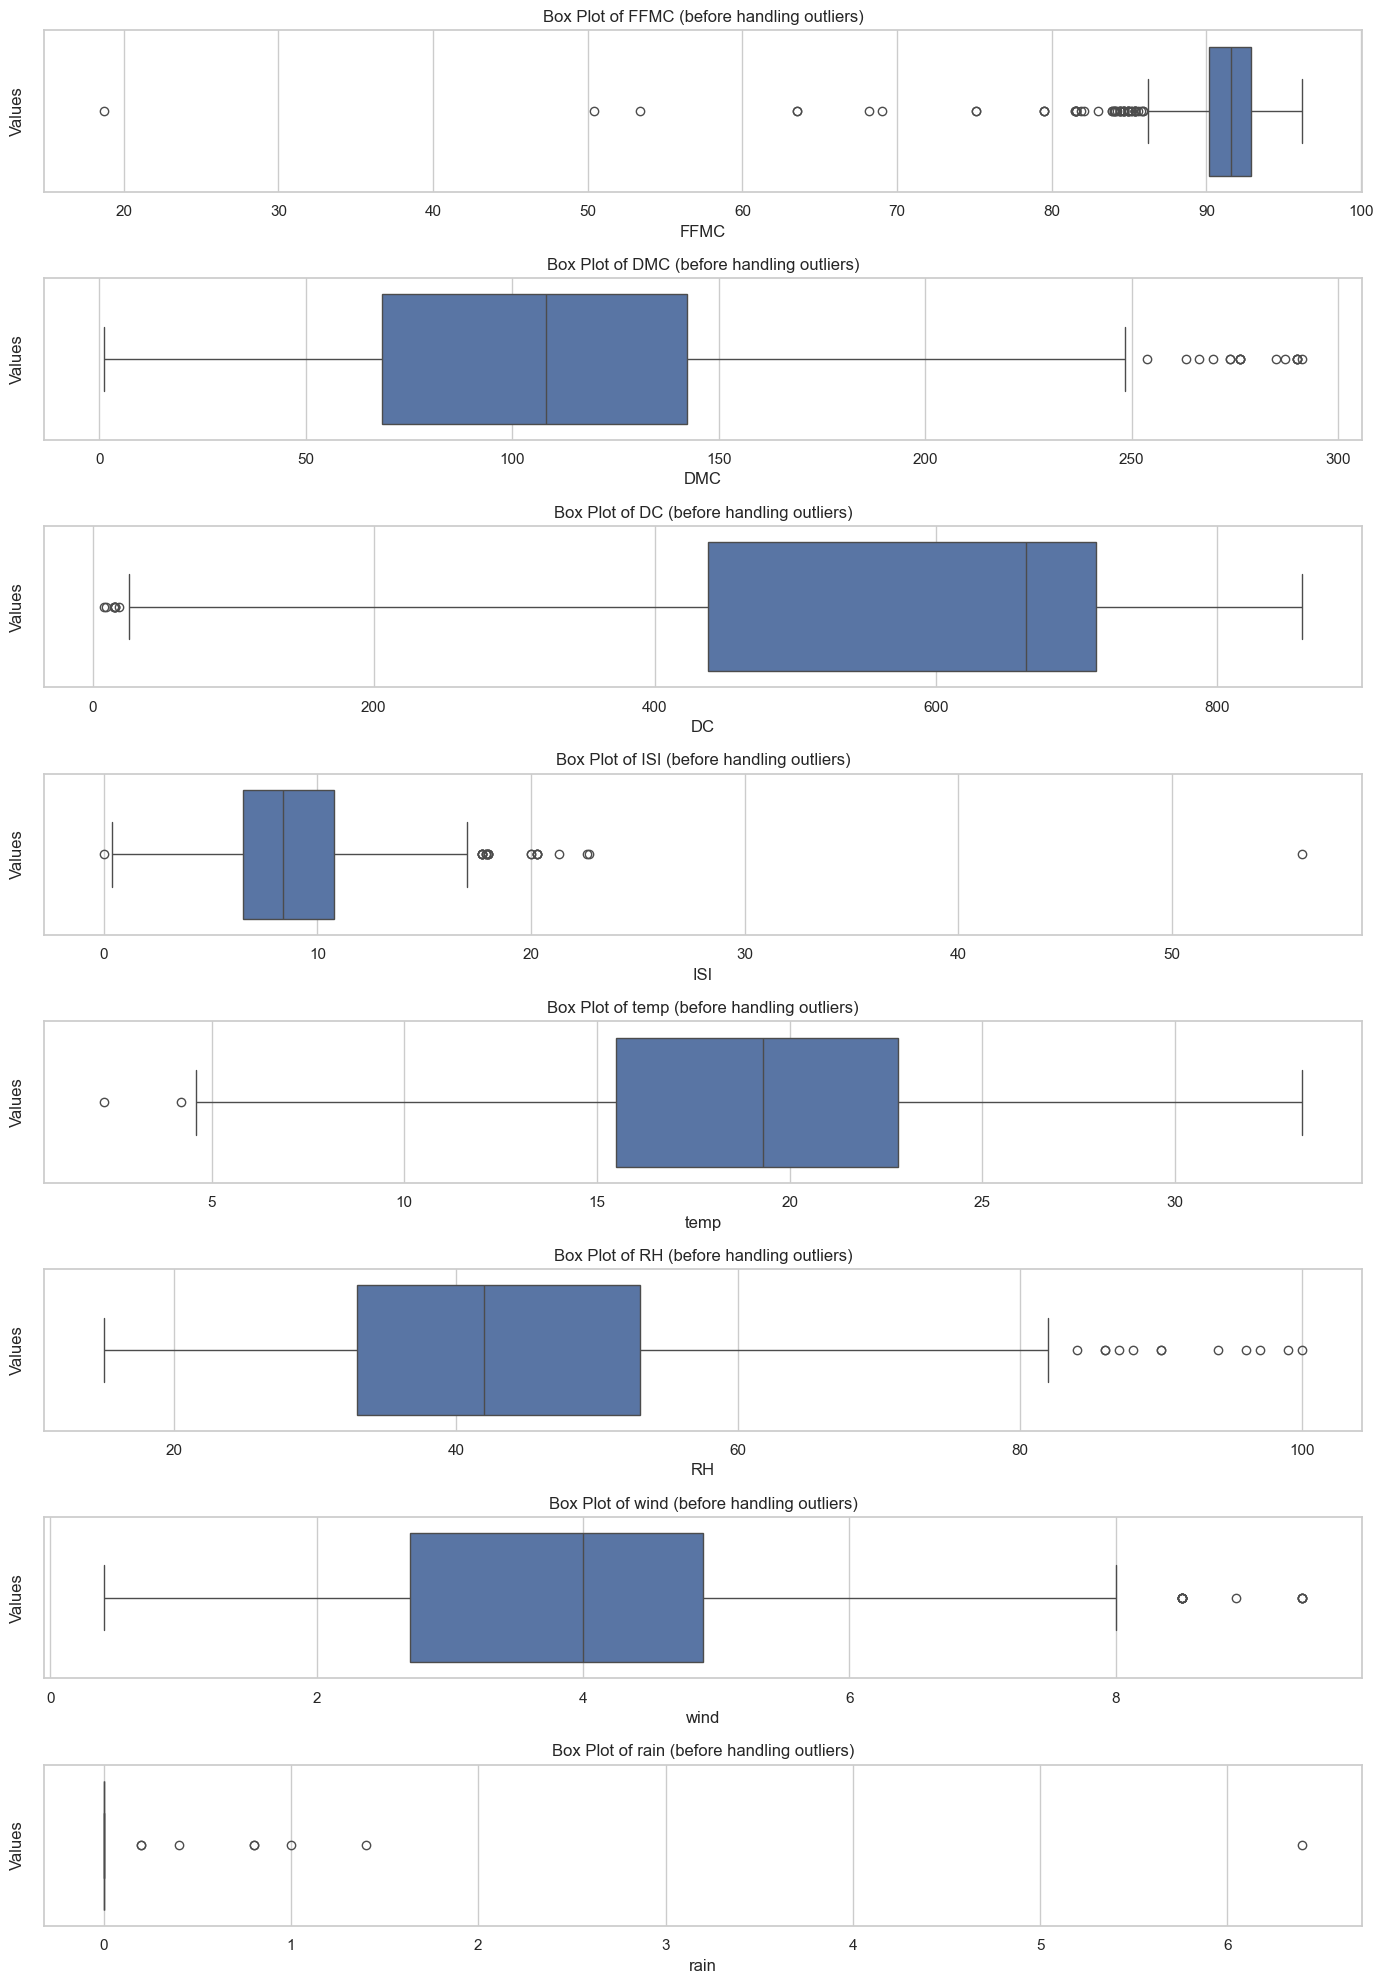

In [207]:

# Visualize original data

df_b4 = df_encoded.copy()

# Select the columns to normalize (also determine the output area as well)
col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

sns.set(style="whitegrid")

# Subplots for Box Plots to visualize outliers
fig, axes = plt.subplots(len(col_norm), 1, figsize=(14, 20))
axes = axes.flatten()

for i, column in enumerate(col_norm):
    sns.boxplot(data=df_b4, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} (before handling outliers)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


<b>Summary of Outlier Handling Techniques:</b>

<i>IQR-Based Capping:</i>
* Robust against skewed distributions; used for FFMC, DMC, DC, ISI.
* By capping at the 1.5 * IQR threshold, effectively reduces the impact 
  of extreme outliers without distorting the main distribution.

<i>Standard Deviation-Based Capping:</i>
* Suitable for normally distributed data; used for temp, RH, wind.
* <u>Threshold:</u> Using a threshold of 3 standard deviations captures the majority of data while limiting extreme values.

<i>Log Transformation:</i>
* Reduces impact of heavily skewed datal; used for rain (& area).
* <u>Impact Reduction:</u> Log transformation reduces the impact of extreme values and makes the data more normally distributed.
* Log-transformed data is easy to interpret, analyze, regress in models.

<i>Percentile-Based Capping:</i>
* Versatile and distribution-free(flexible), applicable to any column - can cap extreme values.
* <u>Bounds:</u> Capping at the 5th and 95th percentiles effectively limits extreme values while retaining the bulk of data.



In [209]:

# (Dealing with Outliers) Outlier Detection.

# Shallow copying for only processing.
df_a4 = df_encoded.copy()    # will be outlier processed.

# Define functions
#-------------------------------------------------------------------------#

def cap_floor_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

#-------------------------------------------------------------------------#

# Not used..
def cap_floor_outliers_std(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()

    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

#-------------------------------------------------------------------------#

def cap_floor_outliers_percentile(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

#-------------------------------------------------------------------------#


# Apply techniques
for col in ['FFMC', 'DMC', 'DC', 'ISI']:
    df = cap_floor_outliers_iqr(df_a4, col)


for col in ['temp', 'RH', 'wind']:
    df = cap_floor_outliers_percentile(df_a4, col)

#for col in ['temp', 'RH', 'wind']:
#    df = cap_floor_outliers_std(df_a4, col)

# Compressing values using log function to kill outliers
df_a4['rain'] = np.log(df_a4['rain'] + 1)
# df_a4['rain'] = np.sqrt(df_a4['rain'] + 1)

# df_a4['area'] = np.log(df_a4['area'] + 1)  # Not to be done to output value
# df_encoded.head(5)


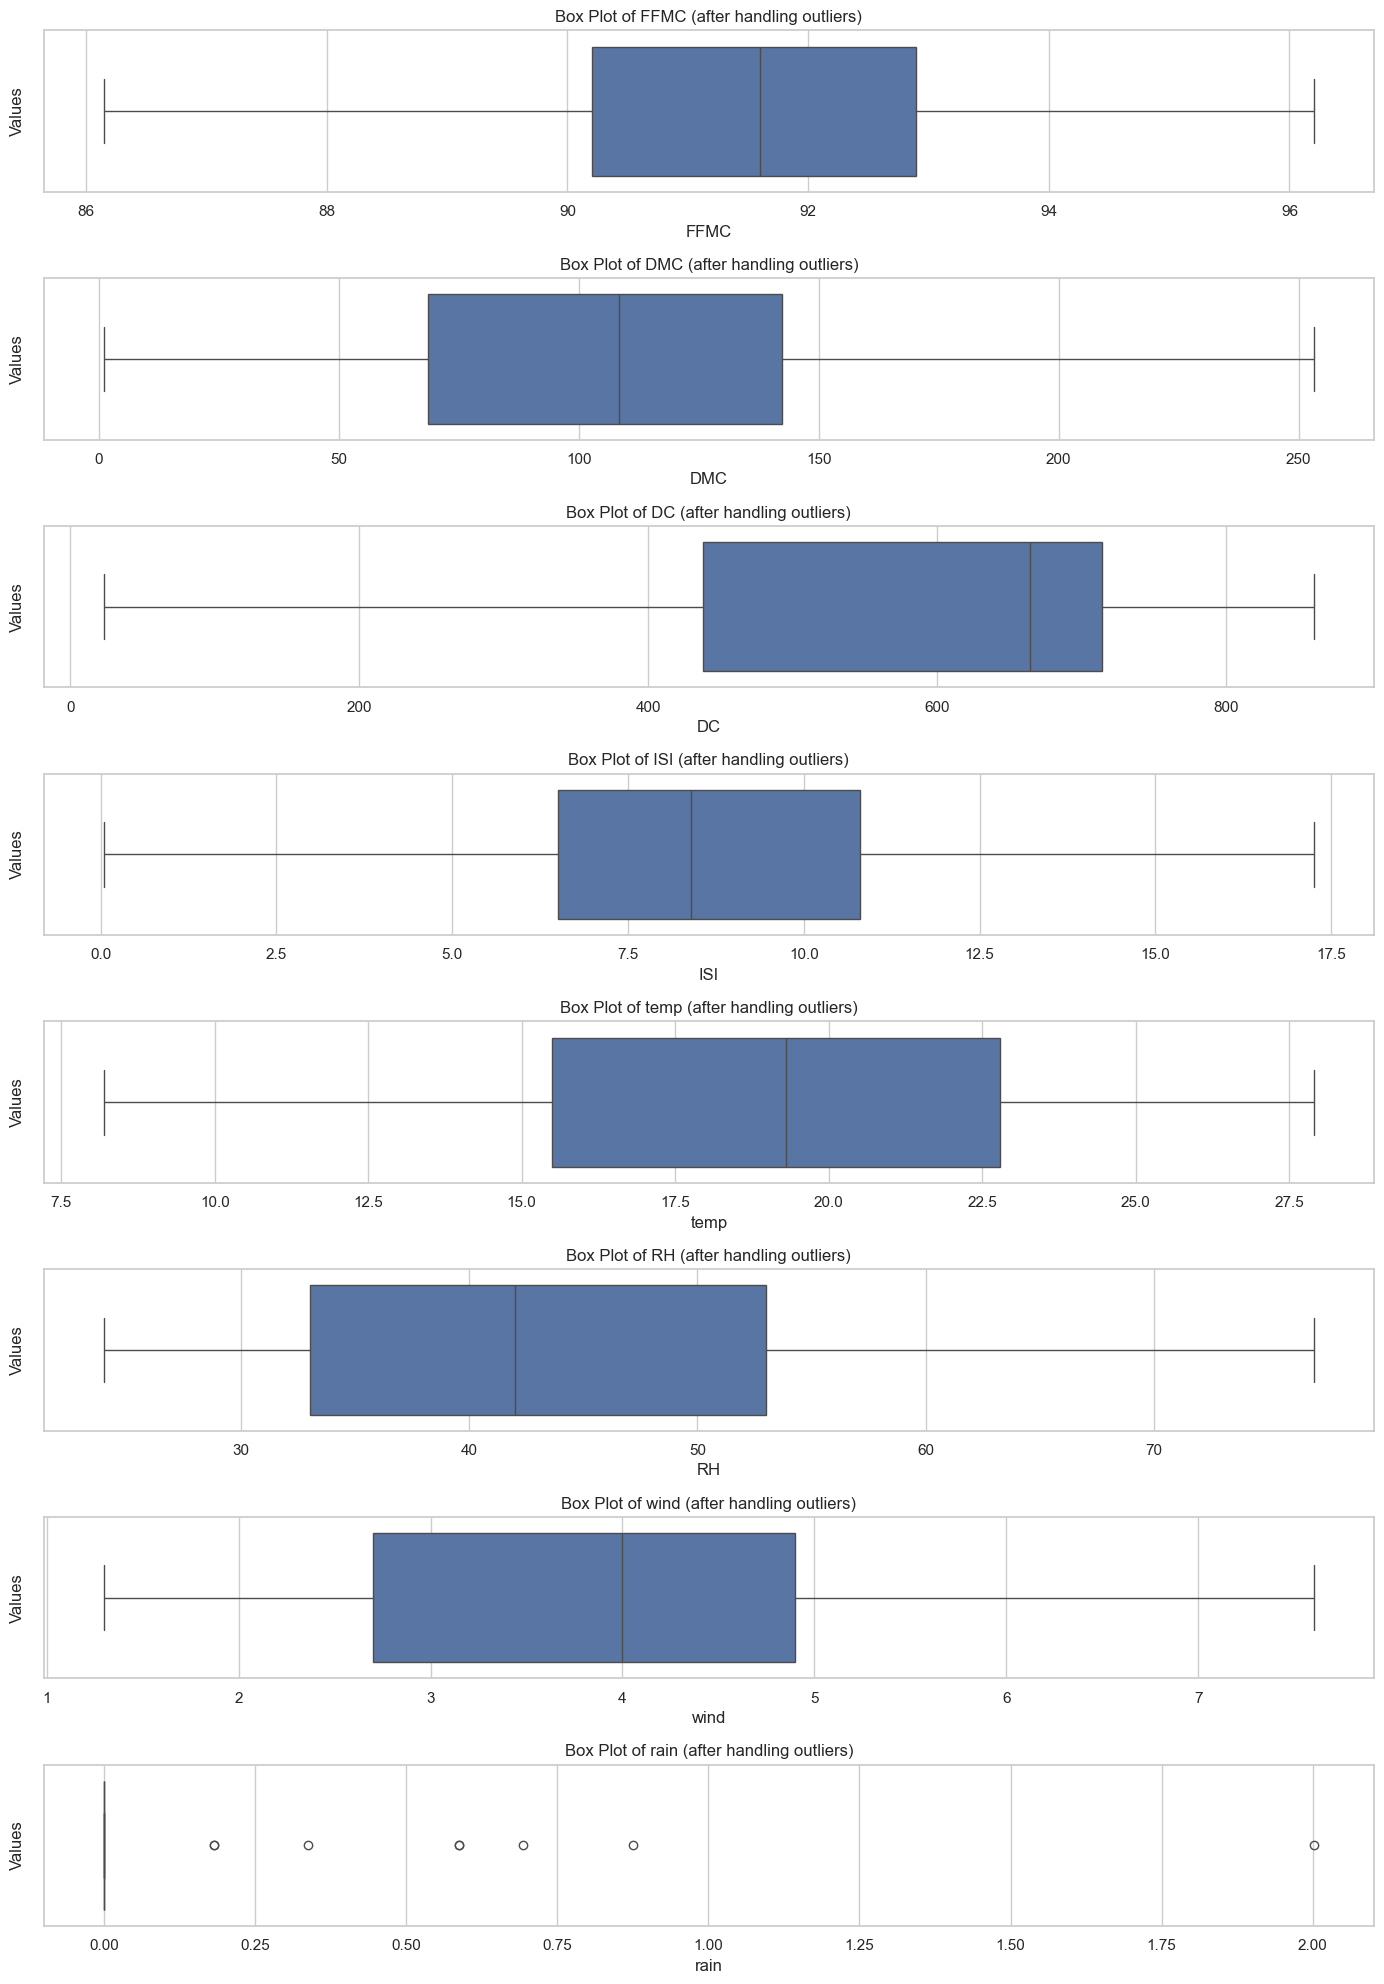

In [210]:

# Visualize the cleaned and normalized data
# import seaborn as sns

sns.set(style="whitegrid")

# Subplots for Box Plots to visualize outliers
fig, axes = plt.subplots(len(col_norm), 1, figsize=(14, 20))
axes = axes.flatten()

for i, column in enumerate(col_norm):
    sns.boxplot(data=df_a4, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} (after handling outliers)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


In [211]:
# Initialize the scaler
scaler = StandardScaler()

# Select the columns to normalize
#col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

df_encoded = df_a4.copy()

# Fit and transform the selected columns
df_encoded[col_norm] = scaler.fit_transform(df_encoded[col_norm])

df_encoded.head(5)


X  Y      FFMC       DMC        DC       ISI      temp        RH      wind  \
0  7  5 -2.023755 -1.354080 -1.833254 -0.971788 -2.032525  0.459192  1.603367   
1  7  4 -0.278531 -1.205507  0.488917 -0.559328 -0.174654 -0.734117 -1.597634   
2  7  4 -0.278531 -1.071468  0.560828 -0.559328 -0.819222 -0.734117 -1.597634   
3  8  6  0.157774 -1.239420 -1.901125  0.033582 -2.013567  2.182860  0.002866   
4  8  6 -0.794166 -0.948734 -1.801338  0.188254 -1.425873  2.182860 -1.301245   

       rain  ...  month_nov  month_oct  month_sep  day_fri  day_mon  day_sat  \
0 -0.097261  ...        0.0        0.0        0.0      1.0      0.0      0.0   
1 -0.097261  ...        0.0        1.0        0.0      0.0      0.0      0.0   
2 -0.097261  ...        0.0        1.0        0.0      0.0      0.0      1.0   
3  1.585908  ...        0.0        0.0        0.0      1.0      0.0      0.0   
4 -0.097261  ...        0.0        0.0        0.0      0.0      0.0      0.0   

   day_sun  day_thu  day_tue  day_wed  
0      0.0      0.0      0.0      0.0  
1      0.0      0.0      1.0      0.0  
2      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0  
4      1.0      0.0      0.0      0.0  

[5 rows x 30 columns]

**<b style="font-size: 20px;">EDA-Exploratory data analysis</b>**



Univariate analysis 

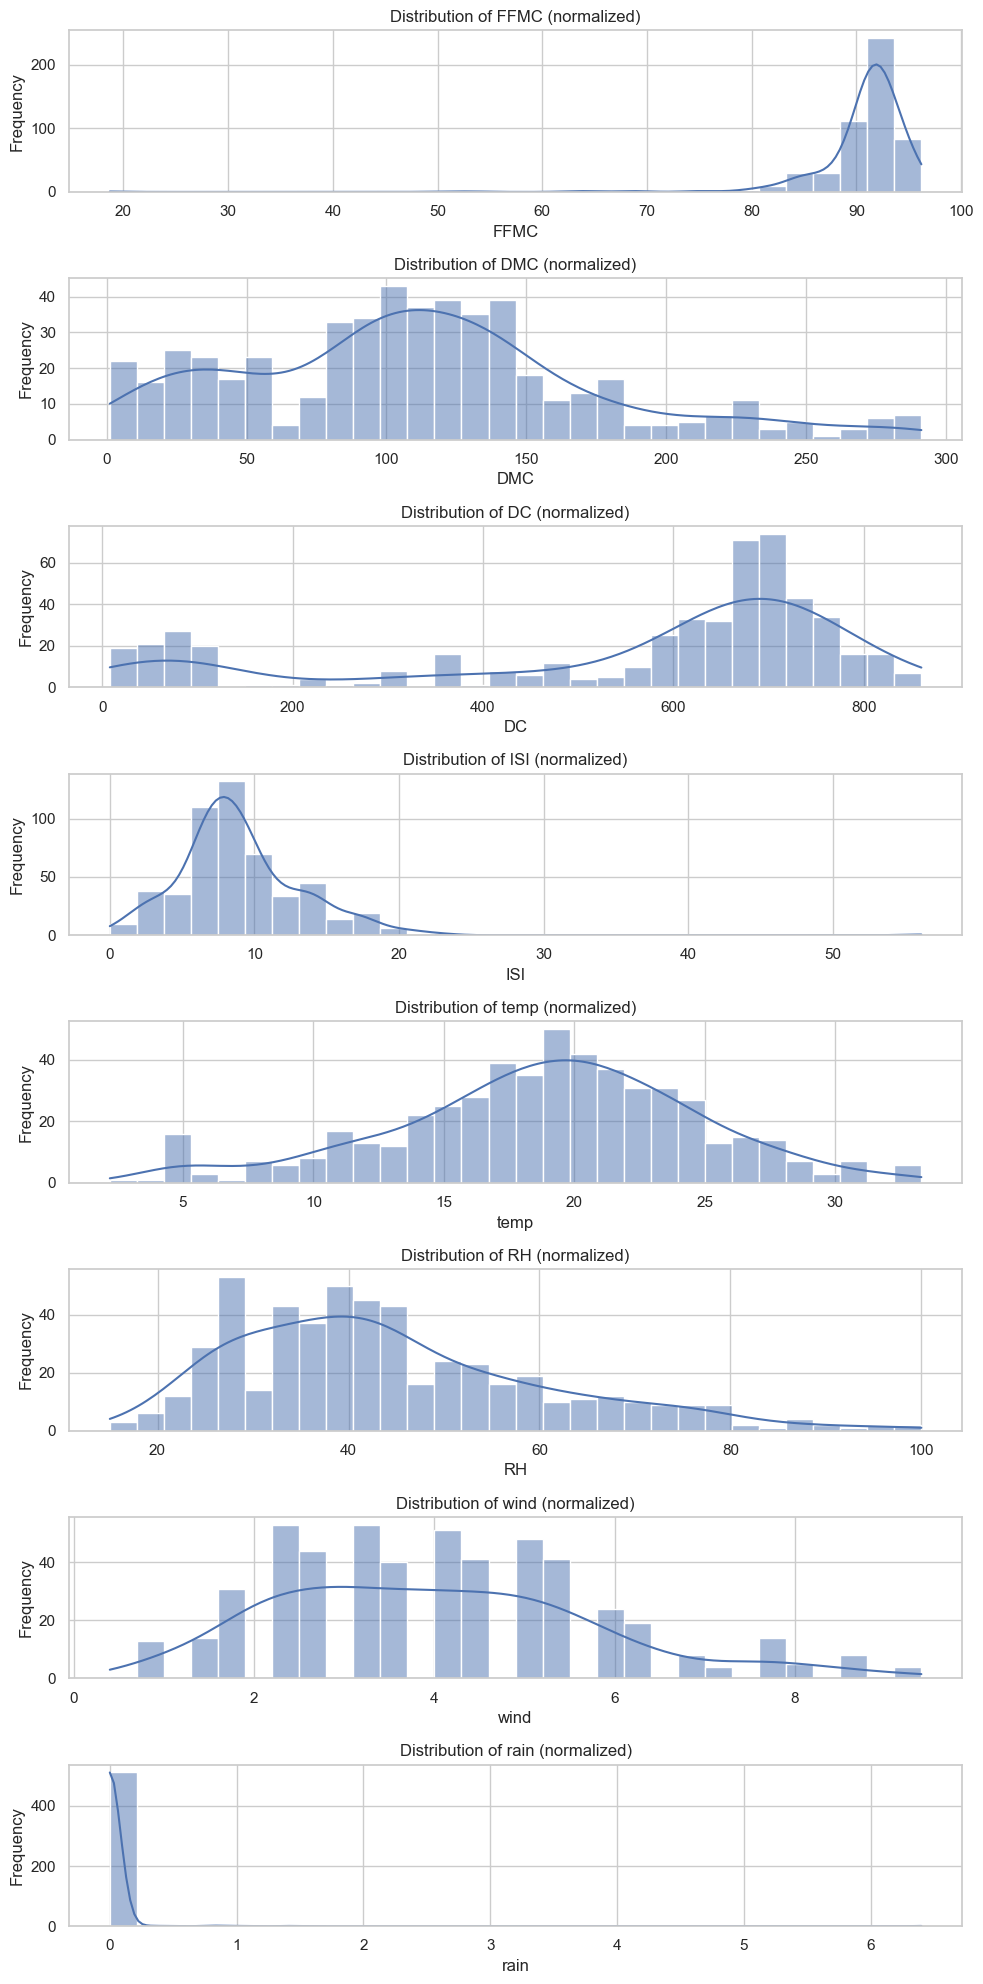

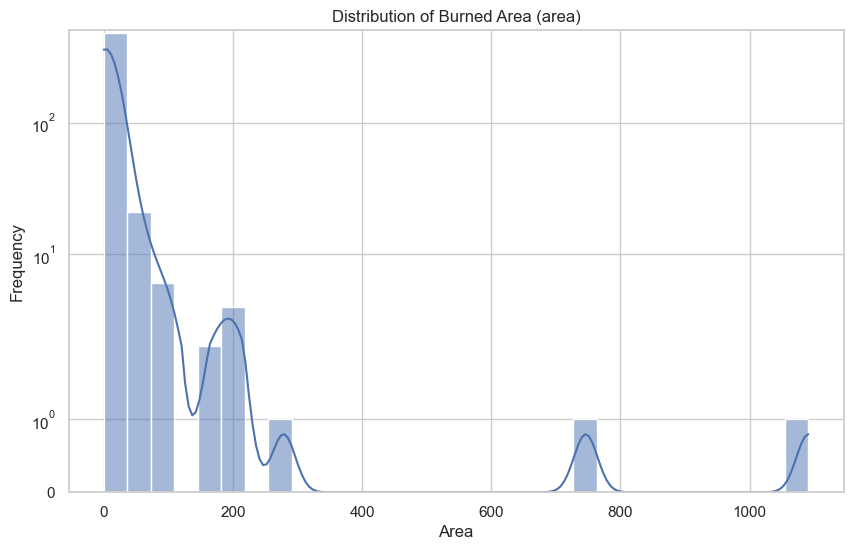

In [214]:
### Histogram ###

# Normalized Coloumns
#col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots for all columns in col_norm
fig, axes = plt.subplots(len(col_norm), 1, figsize=(10, 20))

# Loop through the columns and create histograms
for i, column in enumerate(col_norm):
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} (normalized)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
#    axes[i].set_yscale('symlog') # Apply symlog scale

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Plot the distribution of the target variable 'area'
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area (area)')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.yscale('symlog')  # Use log scale due to the skewed distribution
plt.show()


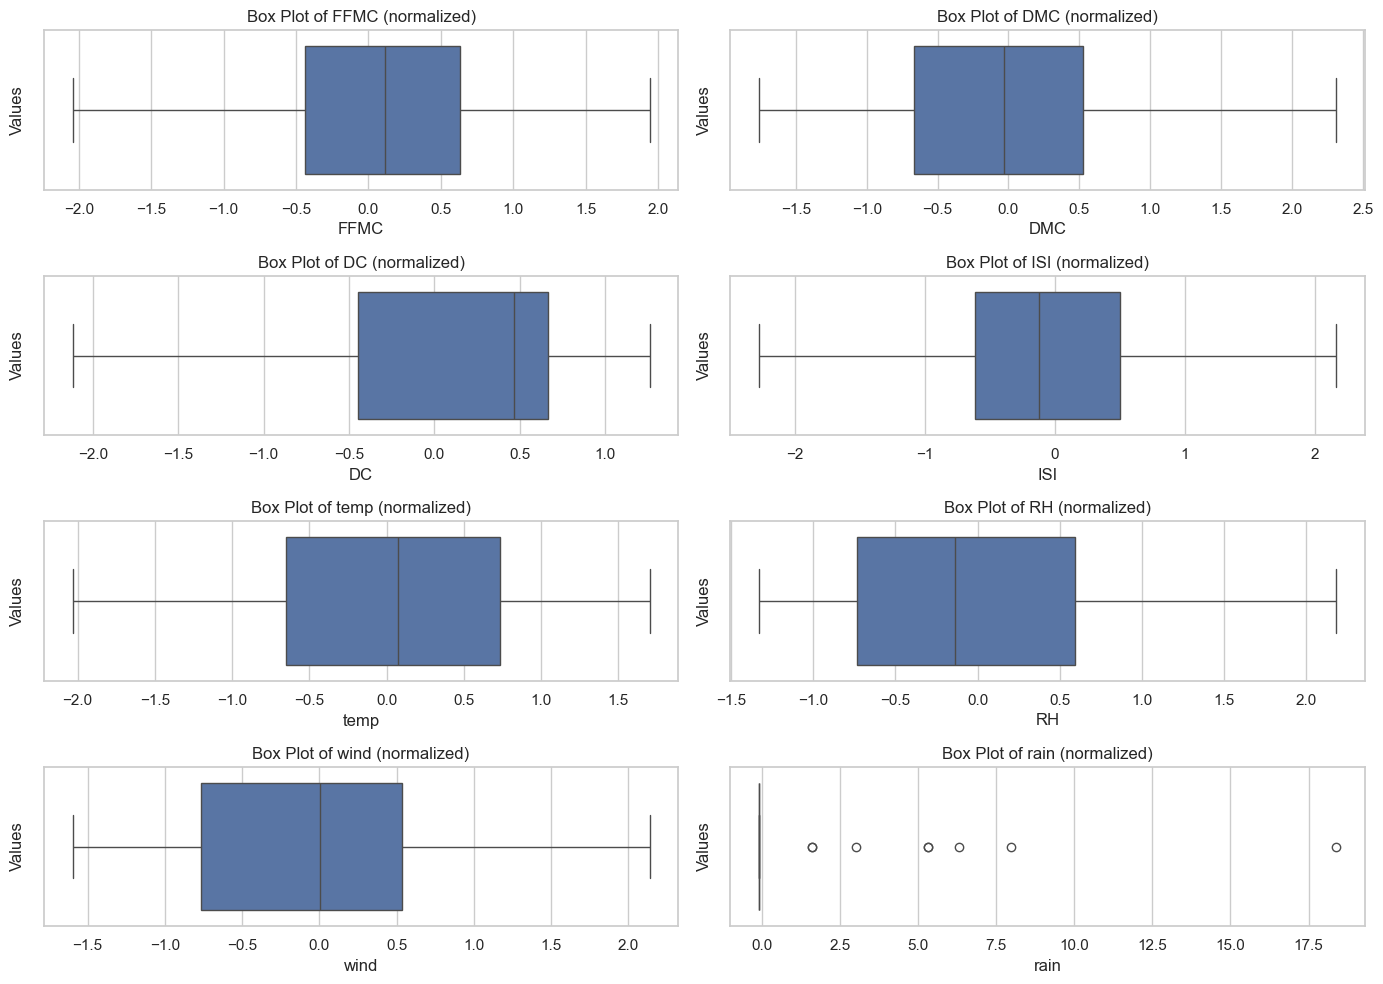

In [215]:

# Columns to normalize
# col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots for box plots in a grid format
num_columns = len(col_norm)
num_cols_in_plot = 2  # Number of columns in the plot grid
num_rows_in_plot = (num_columns + 1) // num_cols_in_plot  # Number of rows needed

fig, axes = plt.subplots(num_rows_in_plot, num_cols_in_plot, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(col_norm):
    sns.boxplot(data=df_encoded, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} (normalized)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Bivariate Analysis

In [217]:
'''
# Geographical scatter plot (using X and Y coordinates)

plt.figure(figsize=(8,6))
sns.scatterplot(x='X', y='Y', size='area', data=data, legend=False)
plt.title("Geographical Scatter Plot of Fires")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()
'''

'\n# Geographical scatter plot (using X and Y coordinates)\n\nplt.figure(figsize=(8,6))\nsns.scatterplot(x=\'X\', y=\'Y\', size=\'area\', data=data, legend=False)\nplt.title("Geographical Scatter Plot of Fires")\nplt.xlabel("X Coordinate")\nplt.ylabel("Y Coordinate")\nplt.show()\n'

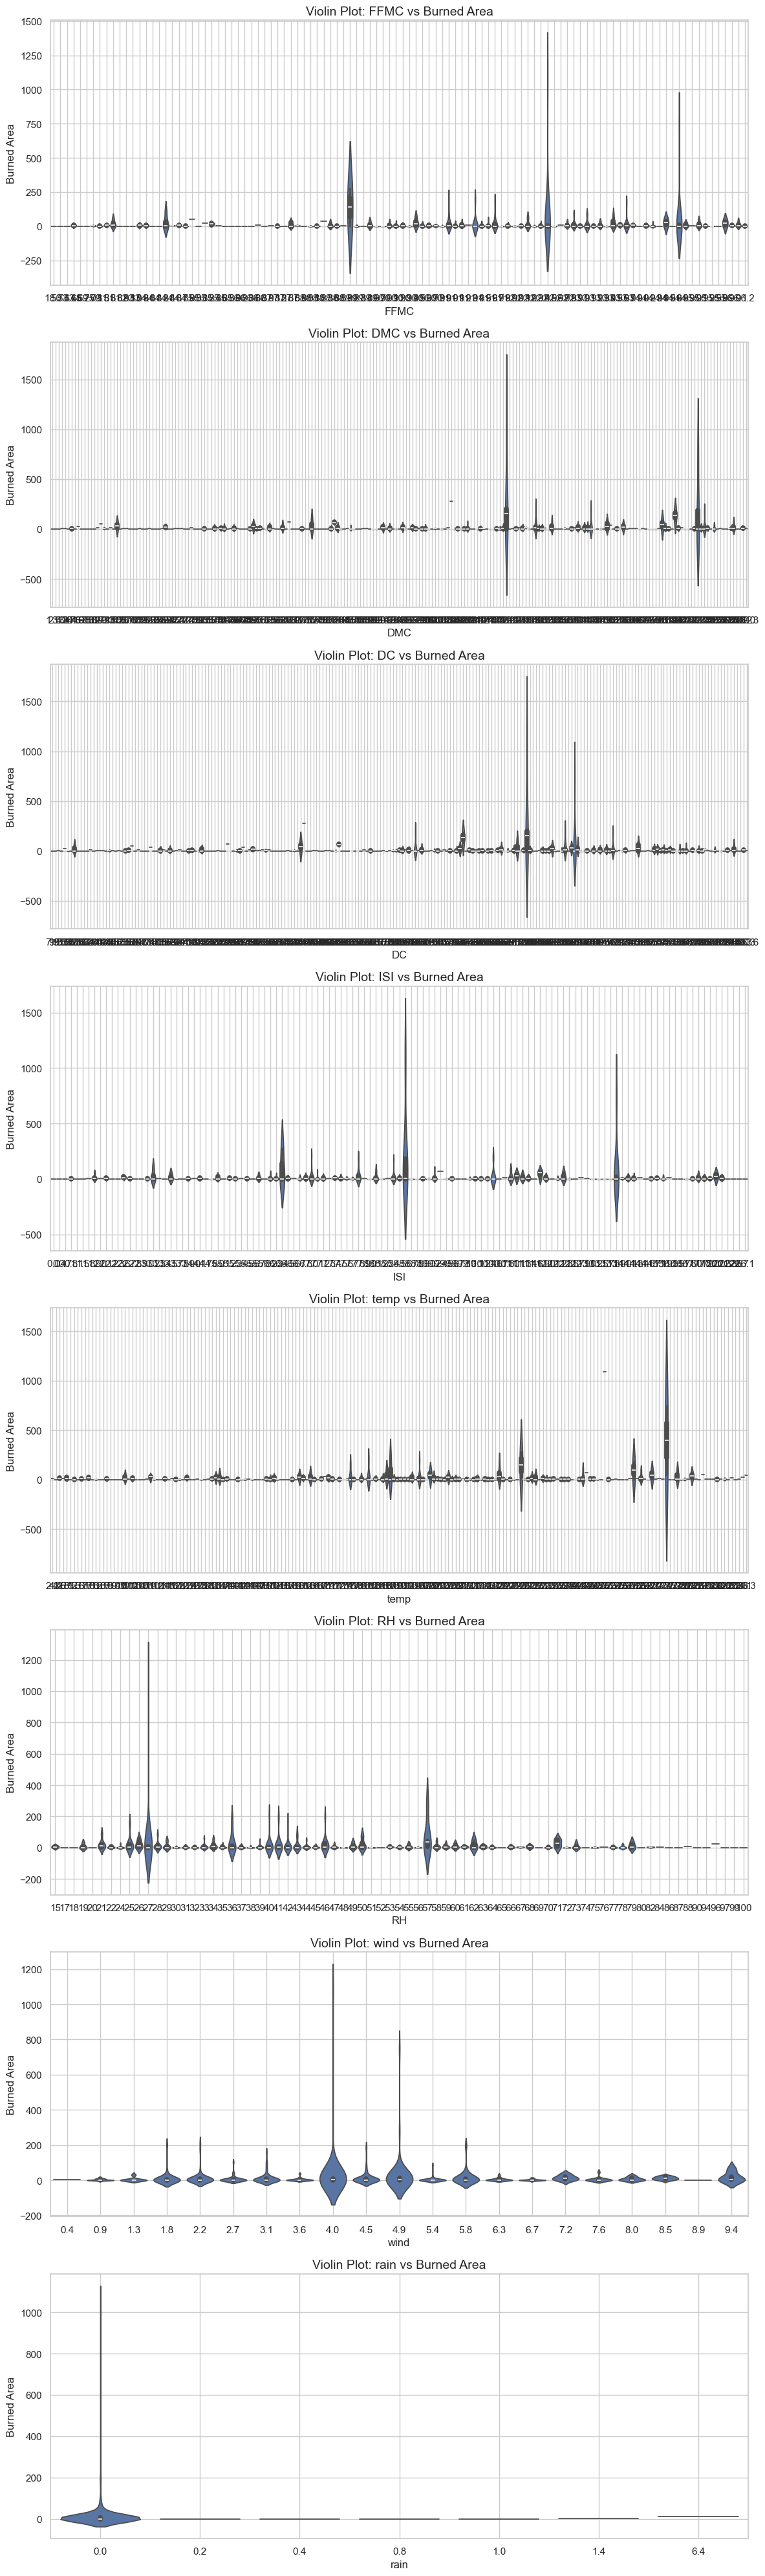

In [218]:
# Violin Plots

# List of columns to plot against 'area'
# columns = col_norm   # ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(len(col_norm), 1, figsize=(12, 40))

# Loop through the columns and create violin plots
for i, column in enumerate(col_norm):
    sns.violinplot(ax=axes[i], x=column, y='area', data=data, density_norm='width')
    axes[i].set_title(f'Violin Plot: {column} vs Burned Area', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Burned Area', fontsize=12)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


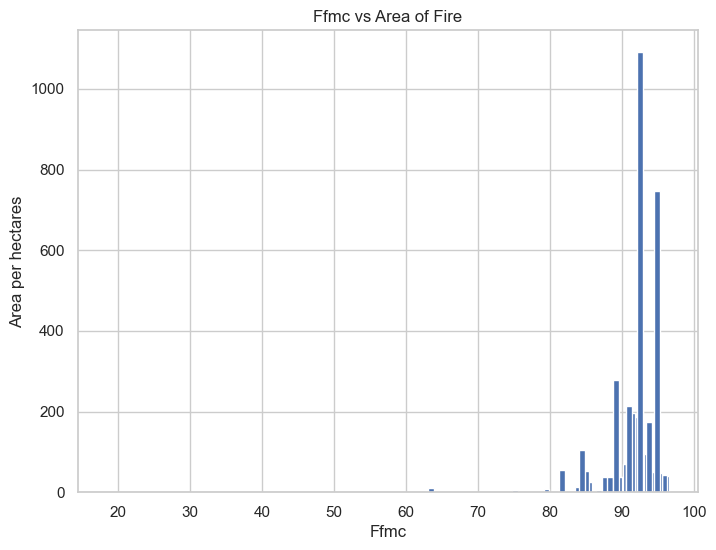

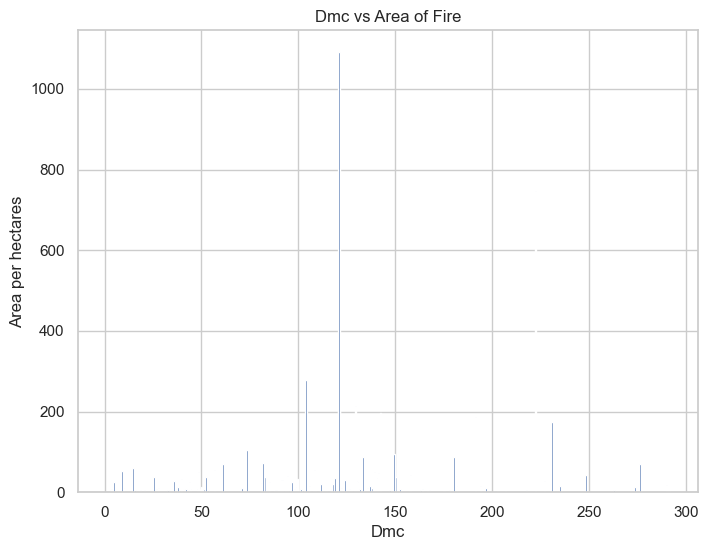

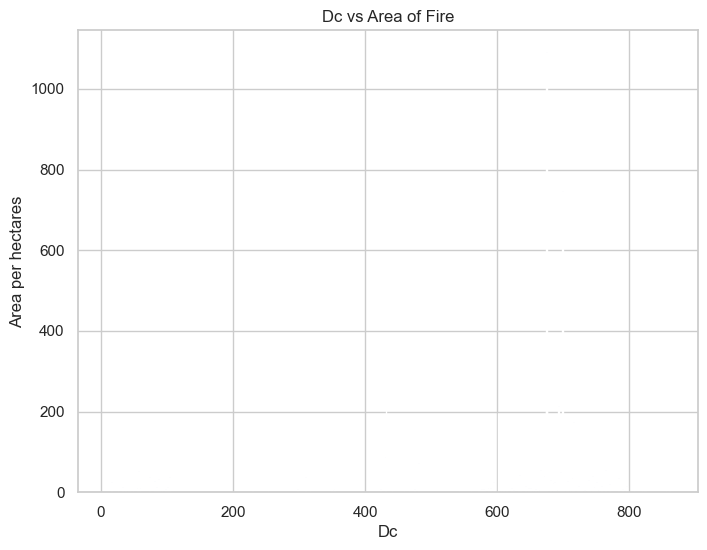

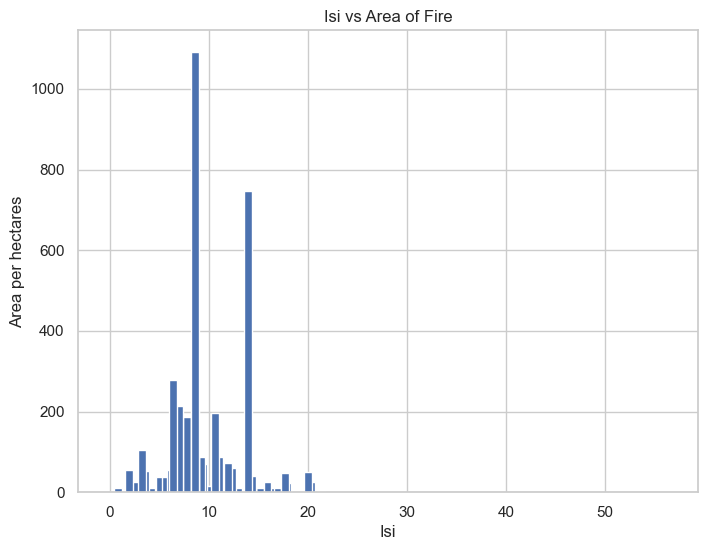

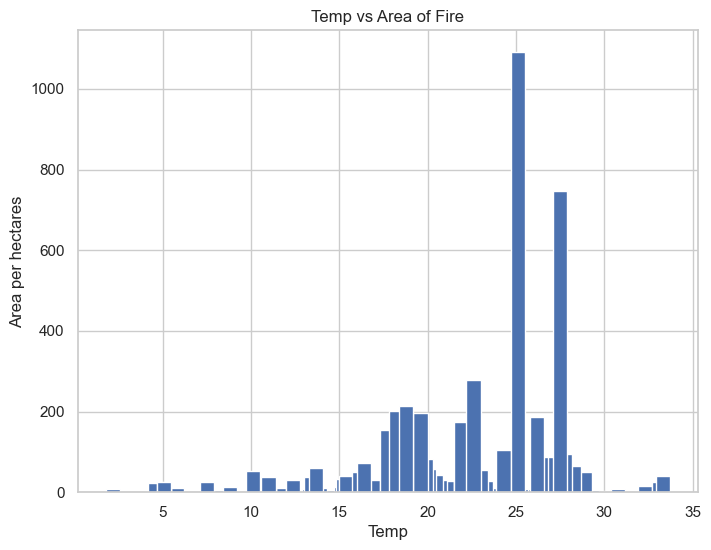

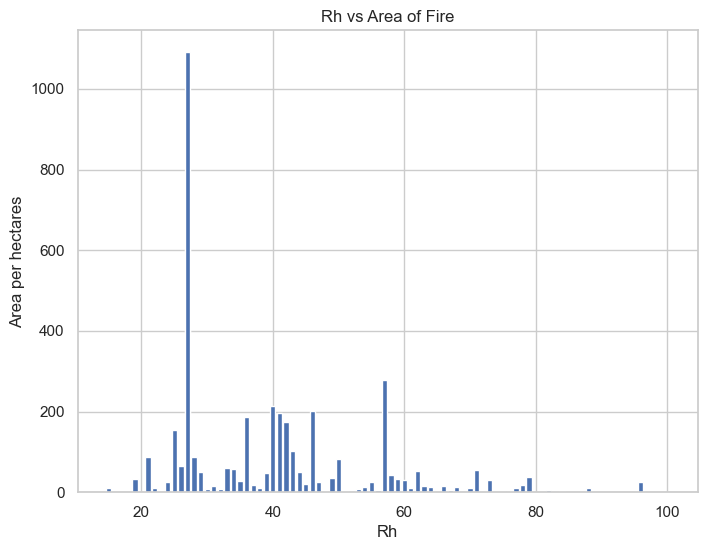

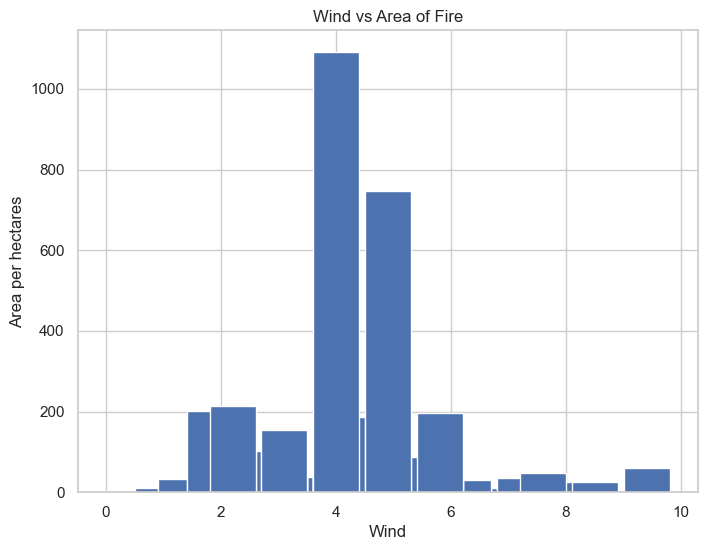

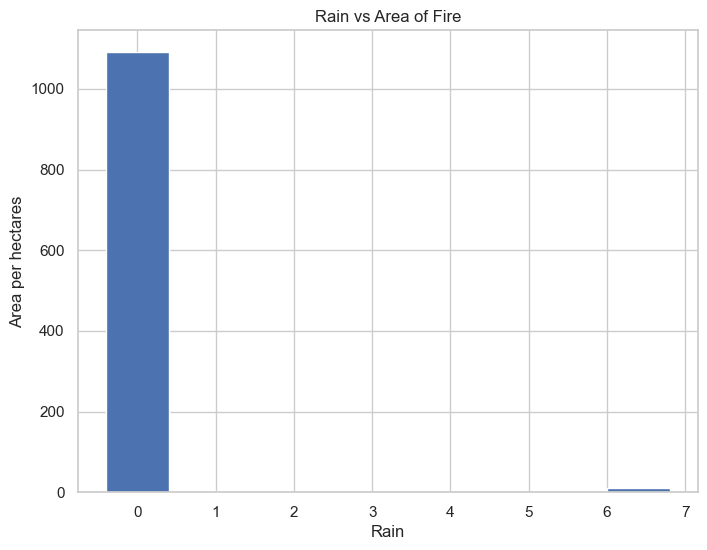

In [219]:
# Bar Graph
'''
highest_fire_area = data.sort_values(by="area", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area'])

plt.xlabel("Temperature")
plt.ylabel("Area per hectres")
plt.show()
'''

# Define the feature vector and include 'temp' and other variables of interest
# col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Sort data by 'area' for consistent visualization
sorted_data = data.sort_values(by='area', ascending=True)

# Loop through each feature and create a bar plot
for feature in col_norm:
    plt.figure(figsize=(8, 6))
    plt.title(f"{feature.capitalize()} vs Area of Fire")
    plt.bar(sorted_data[feature], sorted_data['area'])

    plt.xlabel(feature.capitalize())
    plt.ylabel("Area per hectares")
    plt.show()



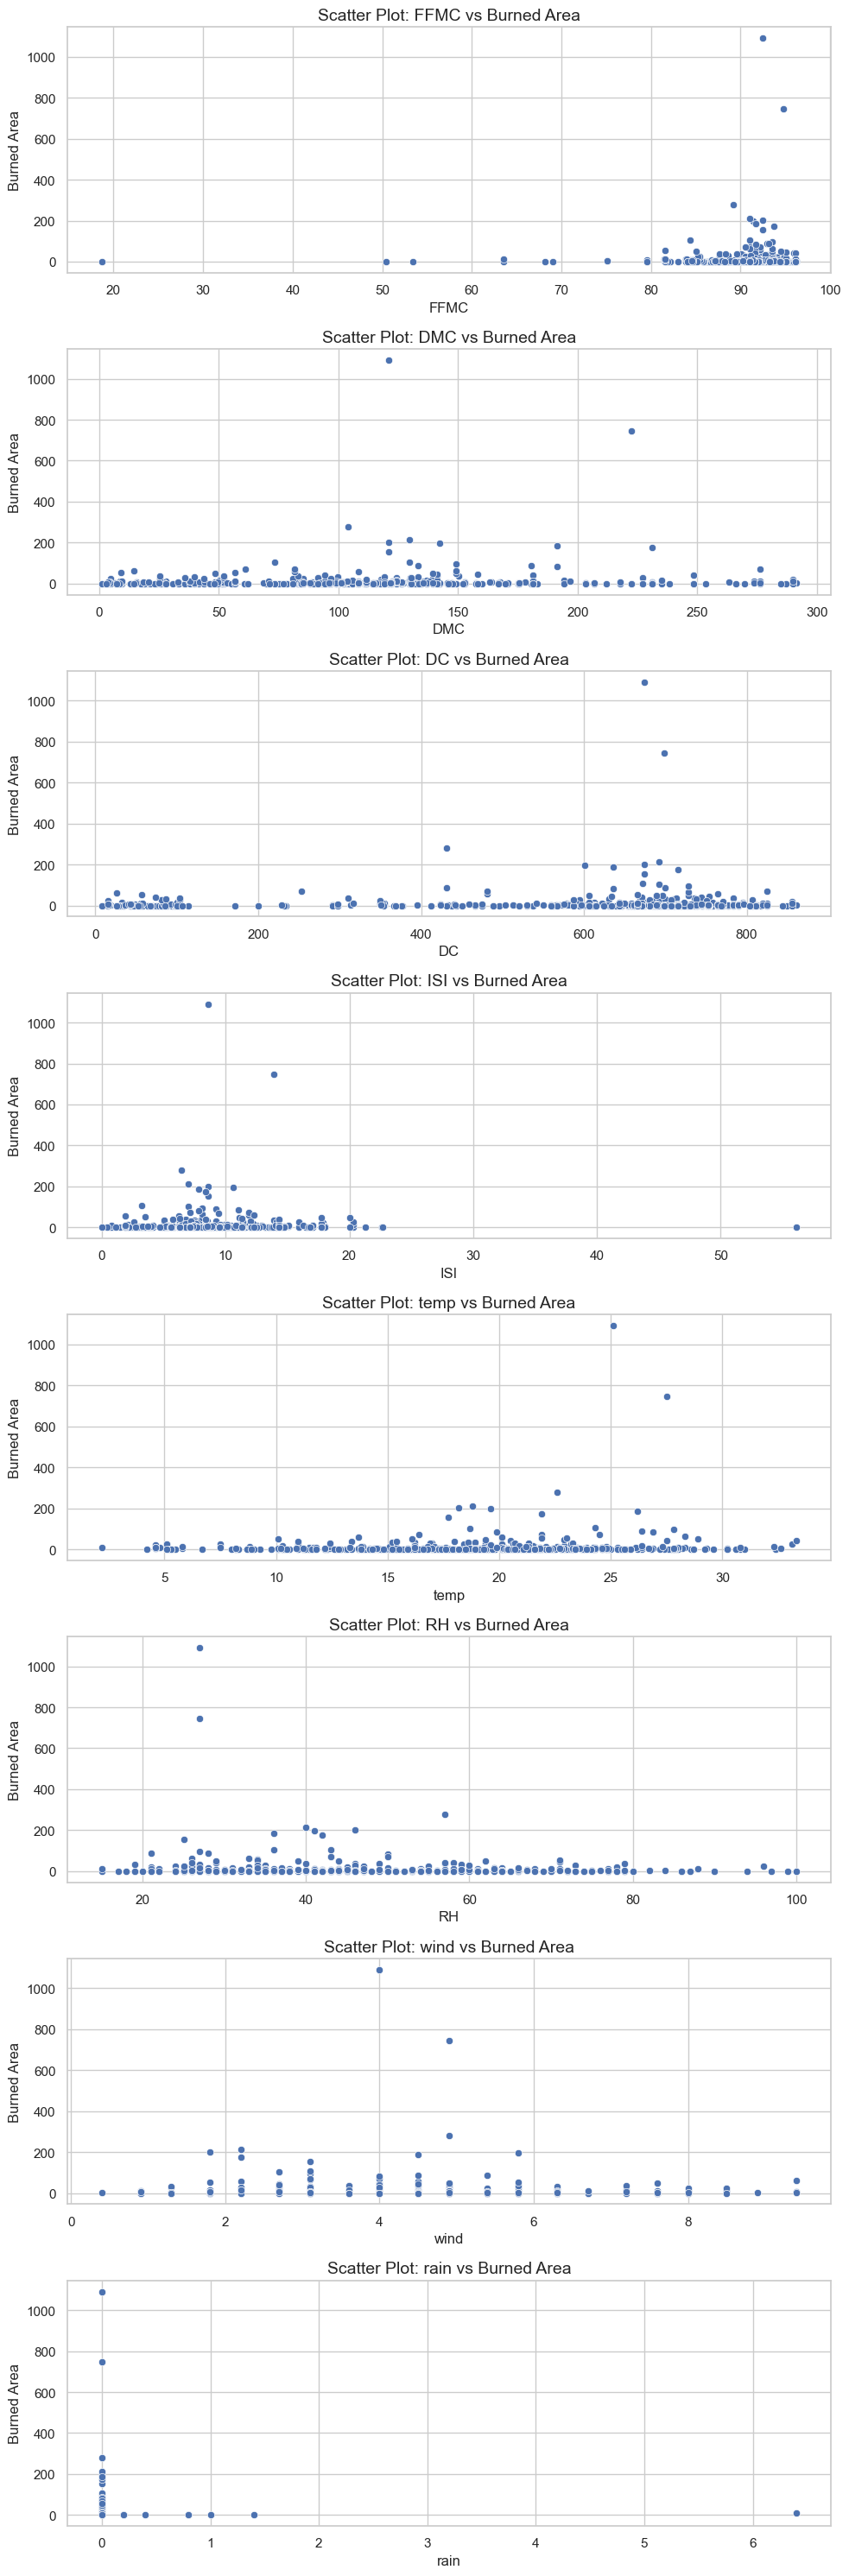

In [220]:
# Scatter Plots

# Scatter plot between diff coloumns and 'area'

# List of columns to plot against 'area'
# col_norm = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(len(col_norm), 1, figsize=(10, 30))

# Loop through the columns and create scatter plots
for i, column in enumerate(col_norm):
    sns.scatterplot(ax=axes[i], x=data[column], y=data['area'])
    axes[i].set_title(f'Scatter Plot: {column} vs Burned Area', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Burned Area', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


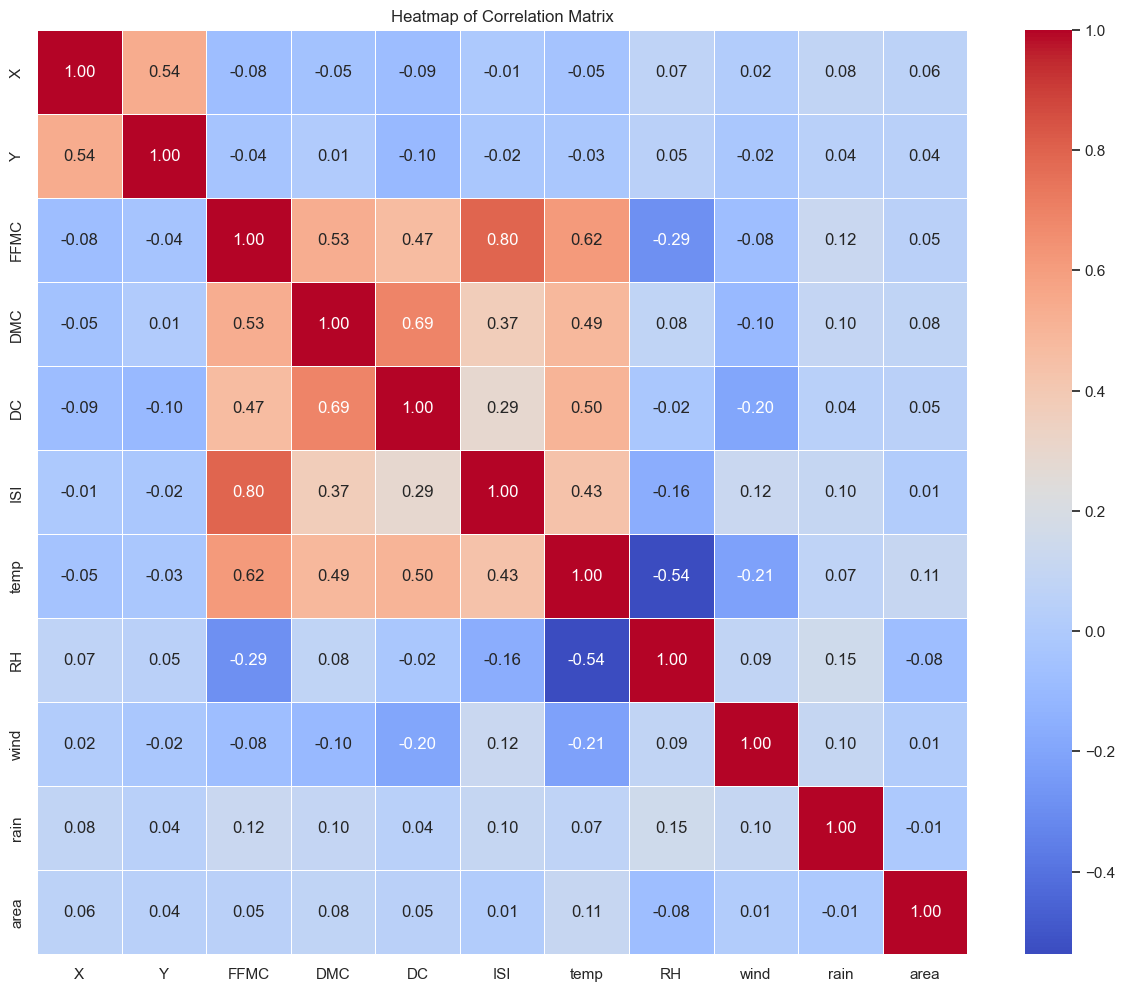

In [221]:

# Correlation Heat-Map to find the correlation between the variables so that we can reduce the number of coloumns.

# All the coloumns(NUMERICAL) in 'data'
col_all = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

plt.figure(figsize=(15, 12))
plt.title('Heatmap of Correlation Matrix')

# Draw the heatmap
# sns.heatmap(data[col_norm].corr(), annot=True, fmt='.2f');

# sns.heatmap(data[col_all].corr(), annot=True, fmt='0.2f');
sns.heatmap(df_encoded[col_all].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.show()



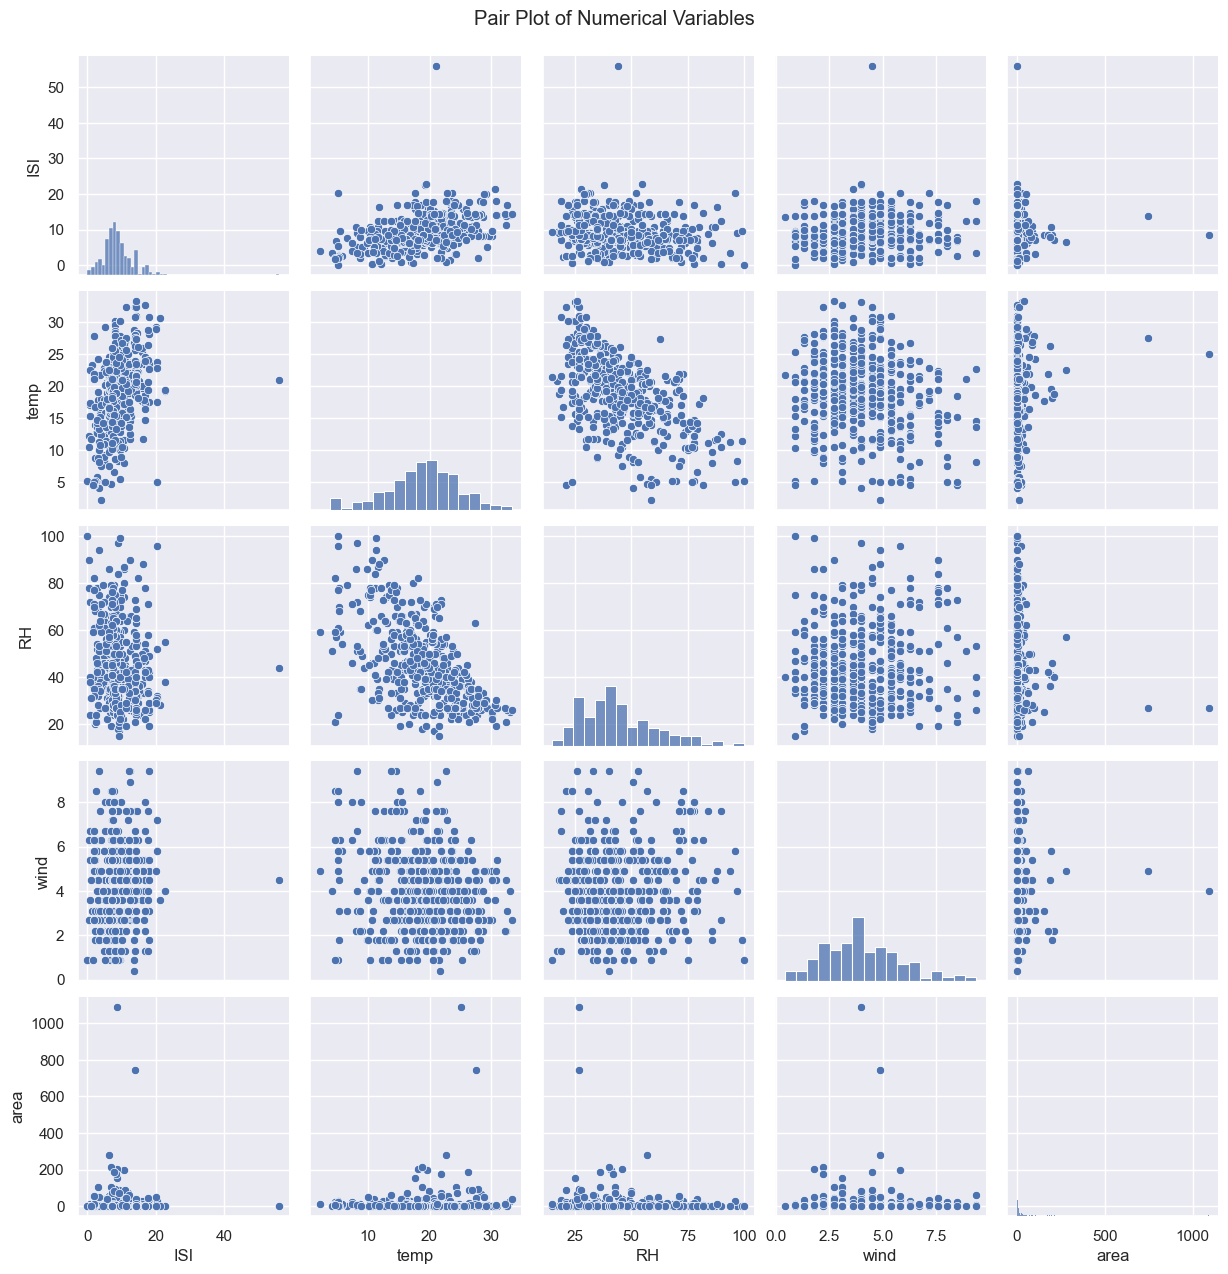

In [222]:

# Setting the style for seaborn plots
sns.set_style('darkgrid')

# Find the relation
# plt.subplot(data)

# Assuming `data` is your DataFrame and 'area' is the correct column name
col_print = ['ISI', 'temp', 'RH', 'wind', 'area']

sns.pairplot(data[col_print])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


Regression Modelling of Preprocessed Data

In [272]:
#features to apply PCA

columnsforpca = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'temp', 'RH']
X = df_encoded[columnsforpca]

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape


(517, 2)

In [306]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

y = df_encoded['area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Normalize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Kernel Ridge Regression': KernelRidge(kernel='rbf'),
    #'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate the models
predictions = {}
relative_errors = {}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    relative_errors[name] = (y_pred - y_test) / y_test
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                    MSE        RMSE        MAE        R²
Linear Regression          11779.350985  108.532718  25.038486  0.000714
ElasticNet                 11787.903661  108.572113  24.660831 -0.000012
Lasso                      11782.640991  108.547874  24.818386  0.000434
Ridge Regression           11779.384545  108.532873  25.036790  0.000711
Decision Tree              17555.137539  132.495802  28.552404 -0.489268
Random Forest              14485.589389  120.356094  26.184666 -0.228867
Gradient Boosting          17282.902119  131.464452  30.354984 -0.466173
Support Vector Regression  12154.790266  110.248765  19.594199 -0.031136
Kernel Ridge Regression    12481.899161  111.722420  25.517201 -0.058886


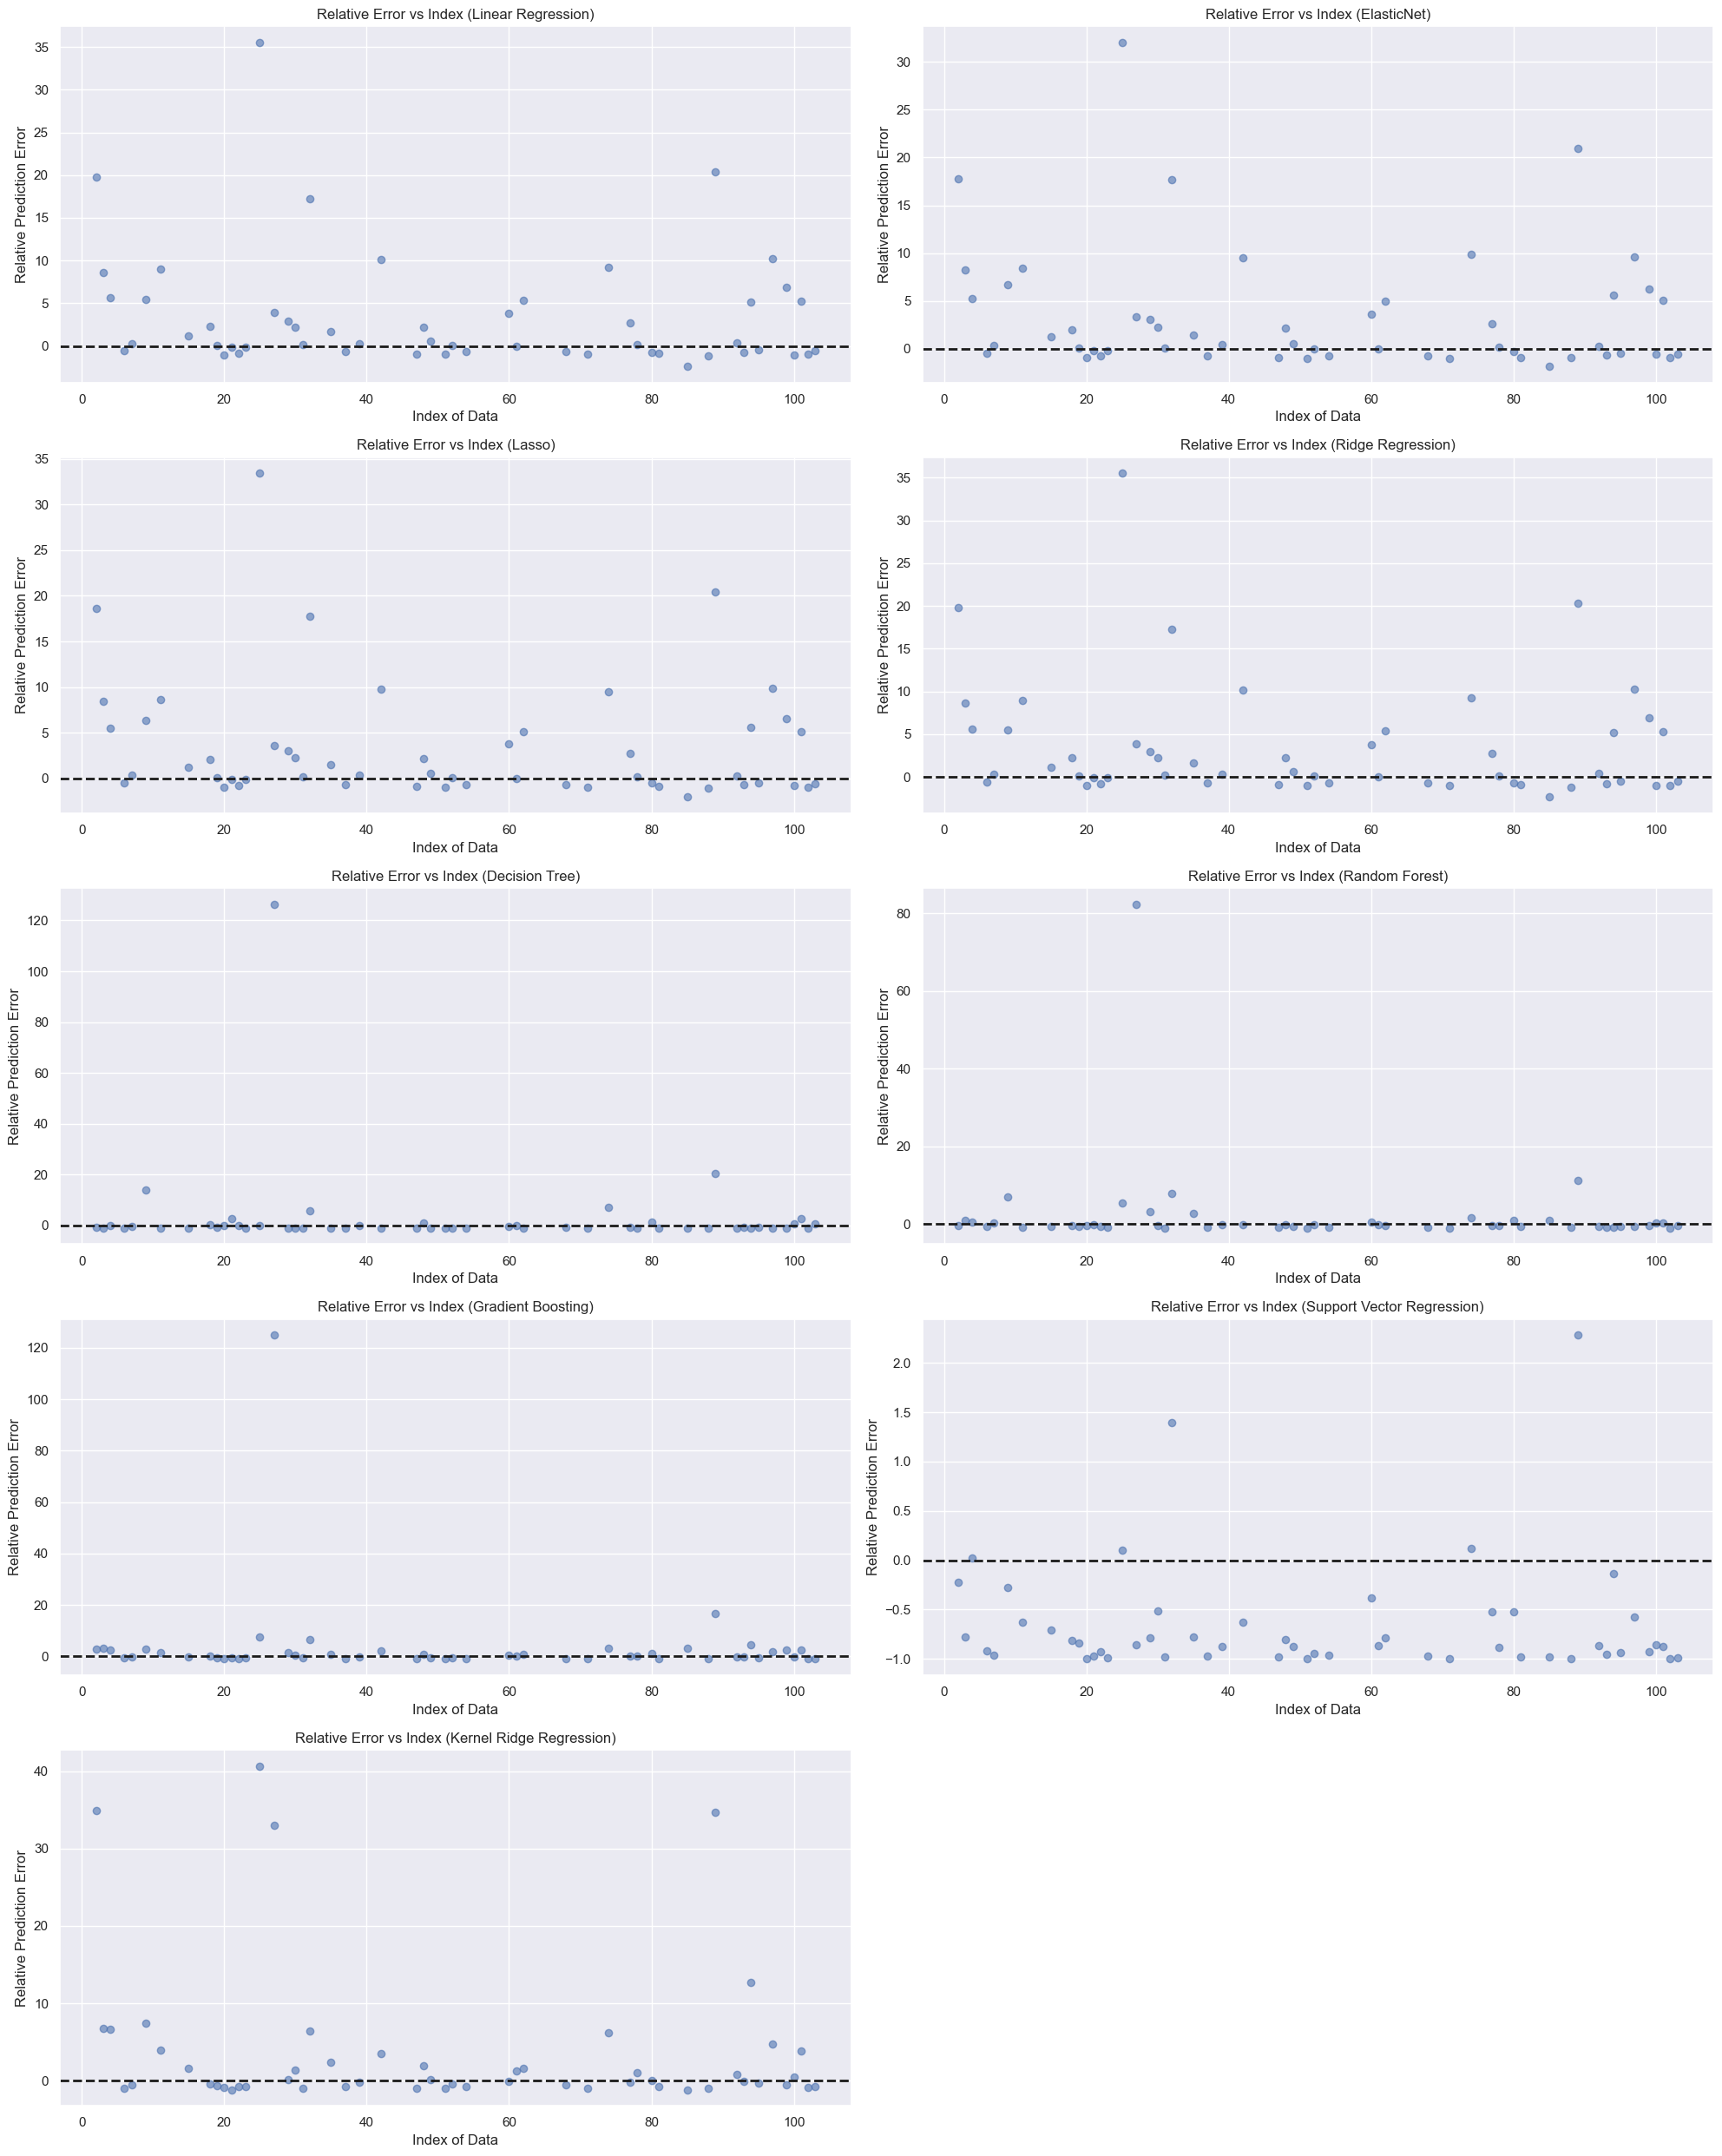

In [278]:
# Relative Error vs. Index for all models

plt.figure(figsize=(20, 25))
for i, (name, rel_error) in enumerate(relative_errors.items(), 1):
    plt.subplot(5, 2, i)
    plt.scatter(range(len(rel_error)), rel_error, alpha=0.6)
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.xlabel('Index of Data')
    plt.ylabel('Relative Prediction Error')
    plt.title(f'Relative Error vs Index ({name})')

plt.tight_layout()
plt.show()


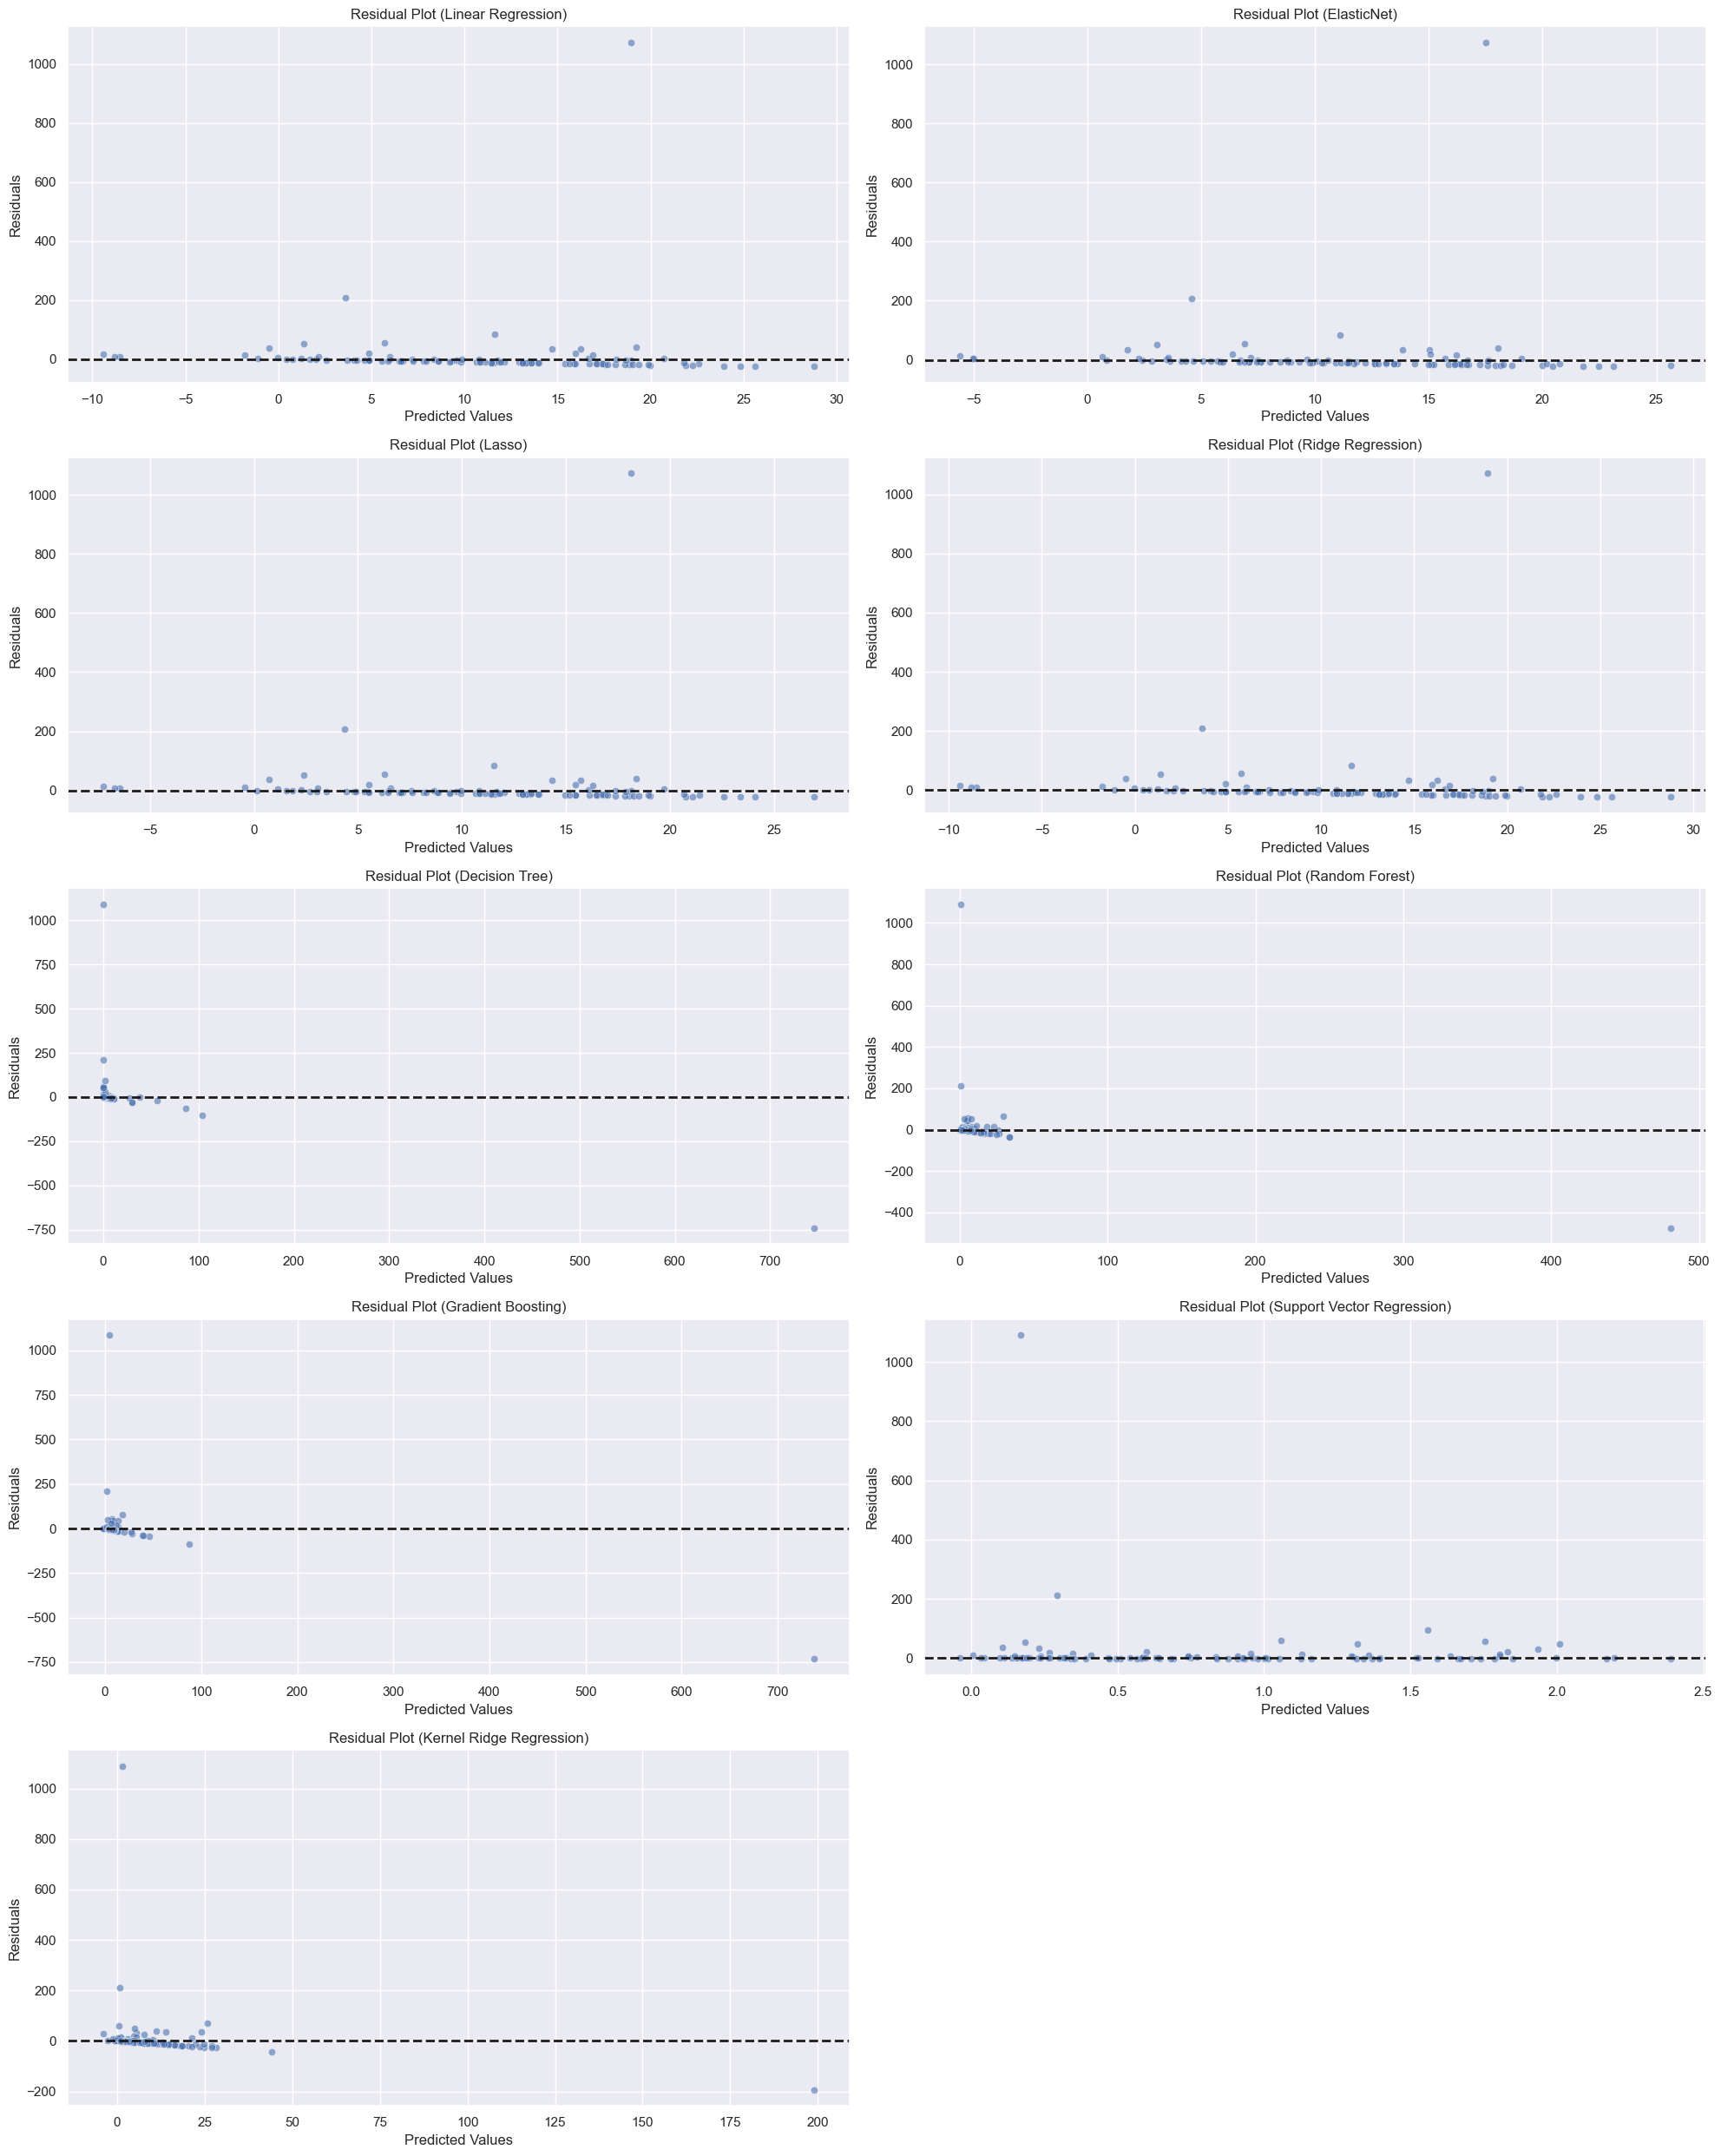

In [227]:
# Residual Plots for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot ({name})')

plt.tight_layout()
plt.show()


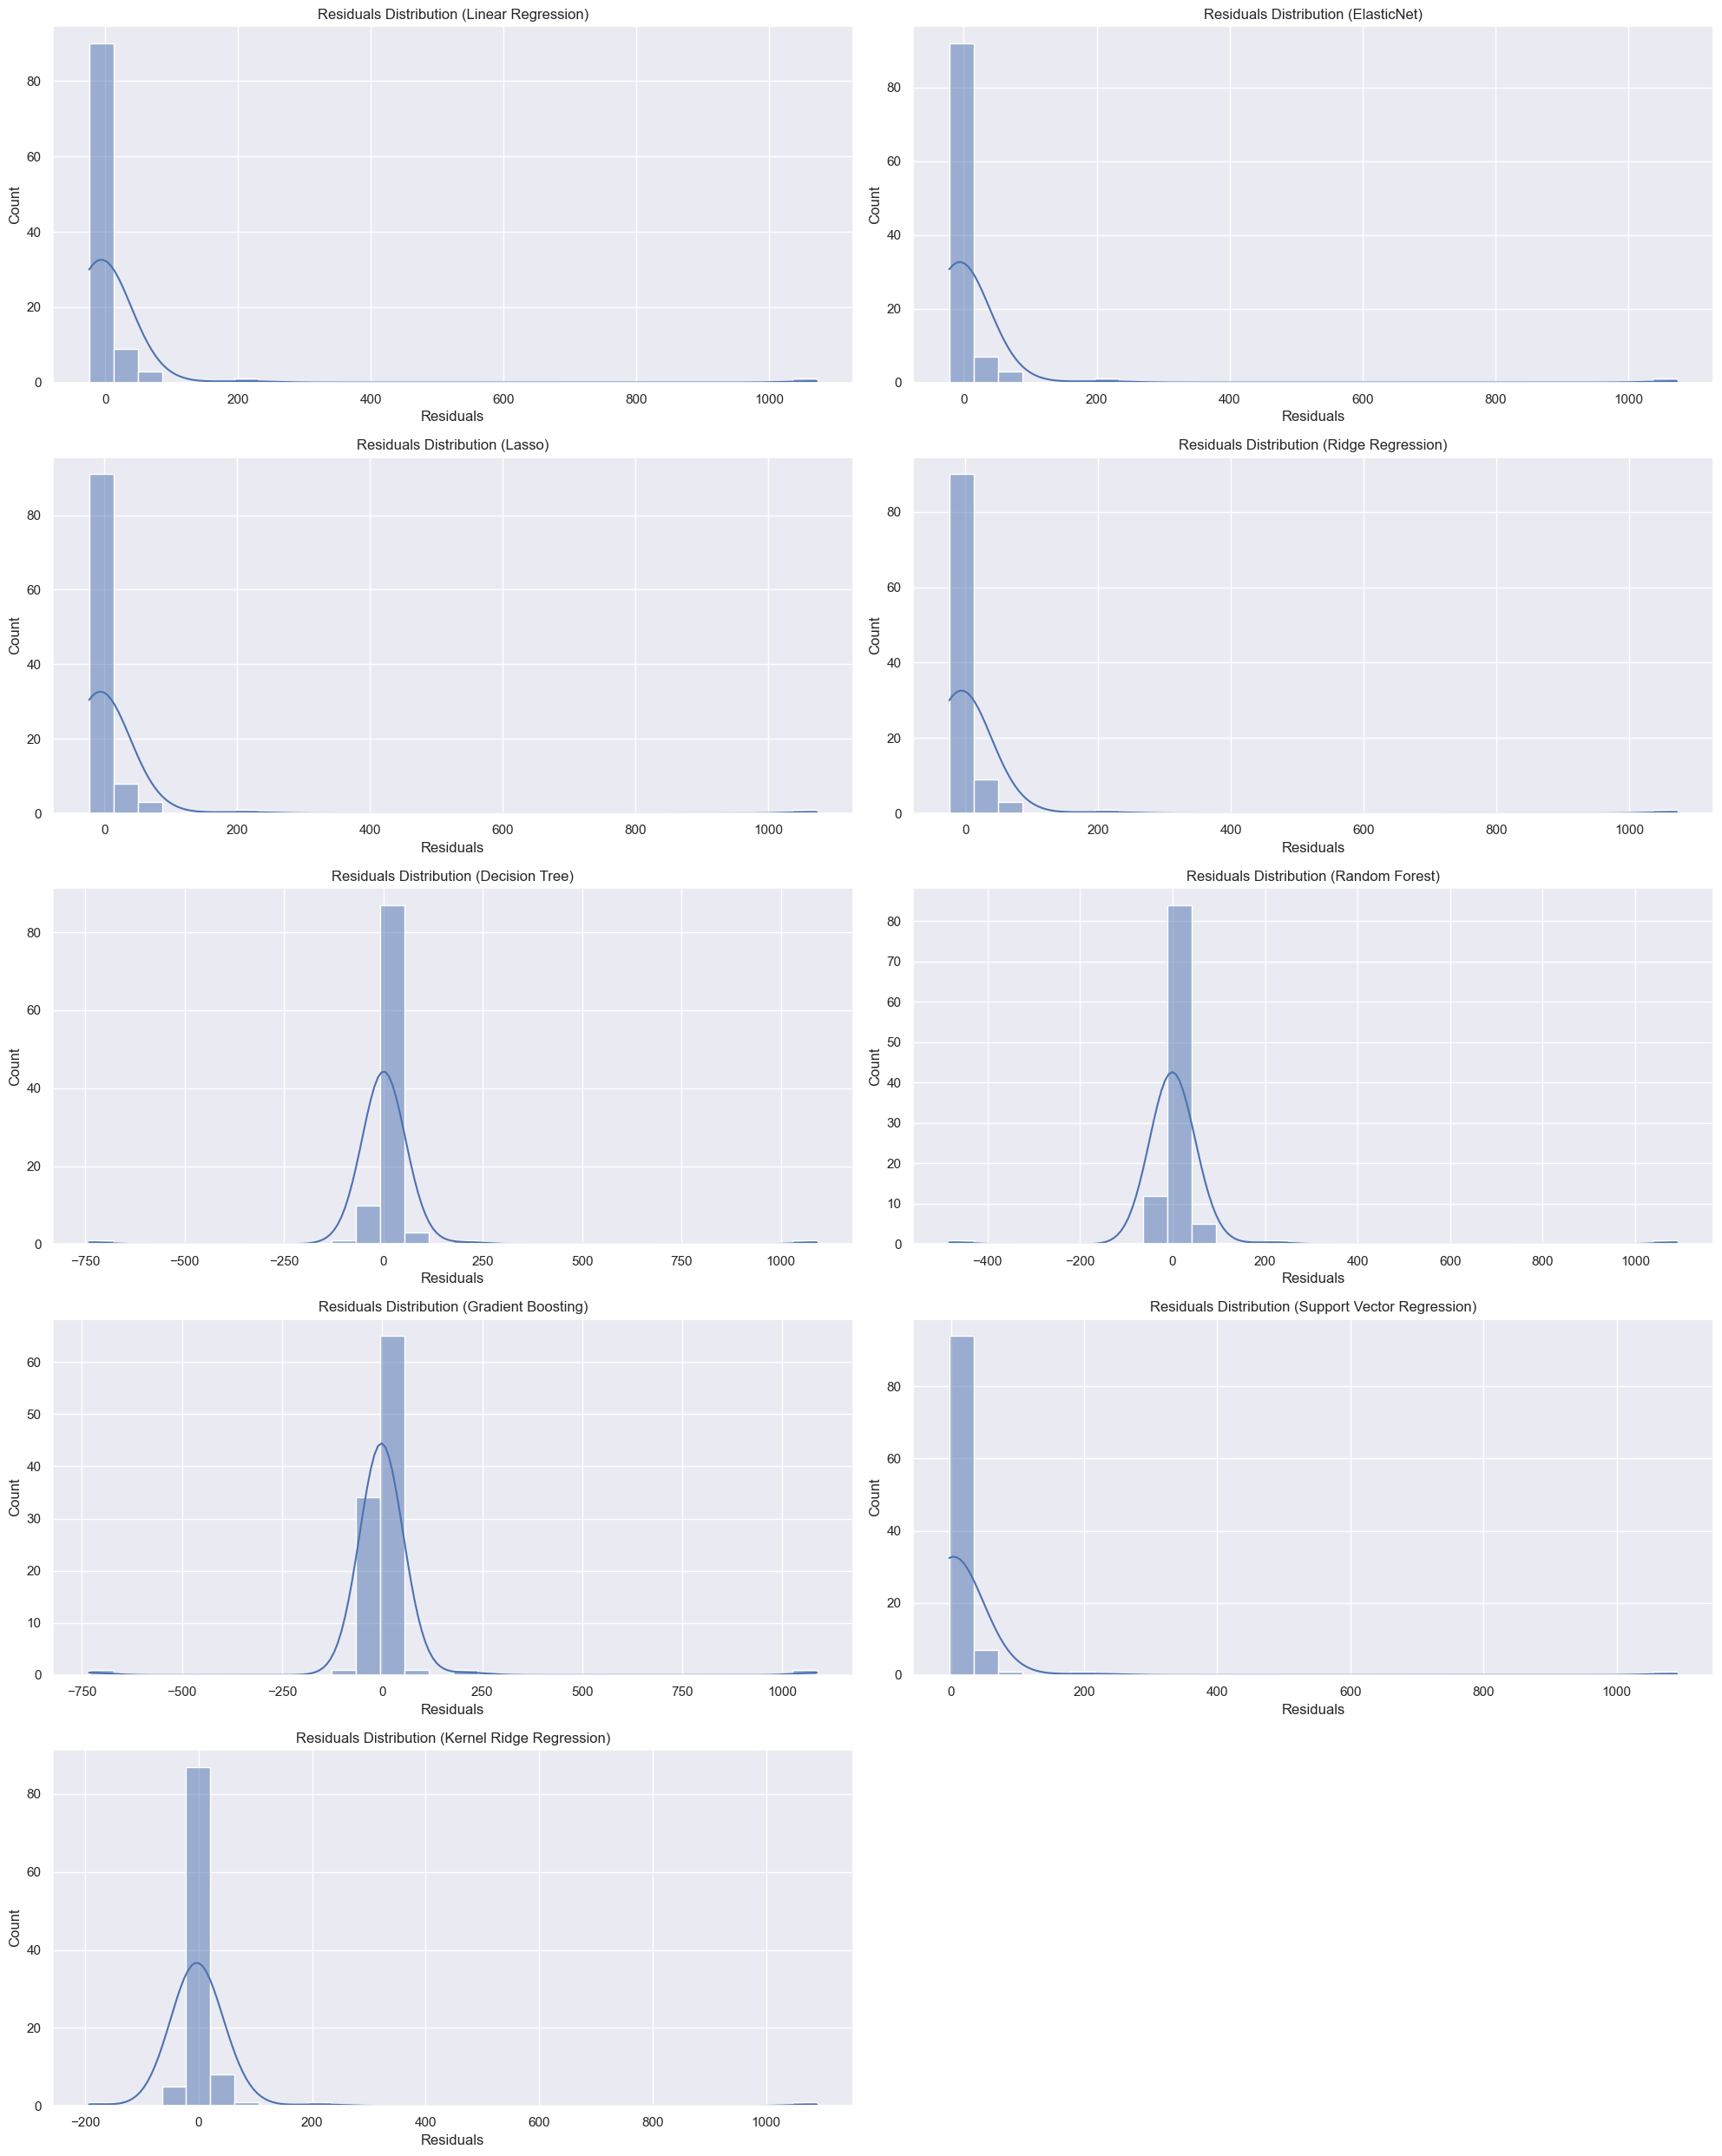

In [280]:
# Histogram of Residuals for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution ({name})')

plt.tight_layout()
plt.show()


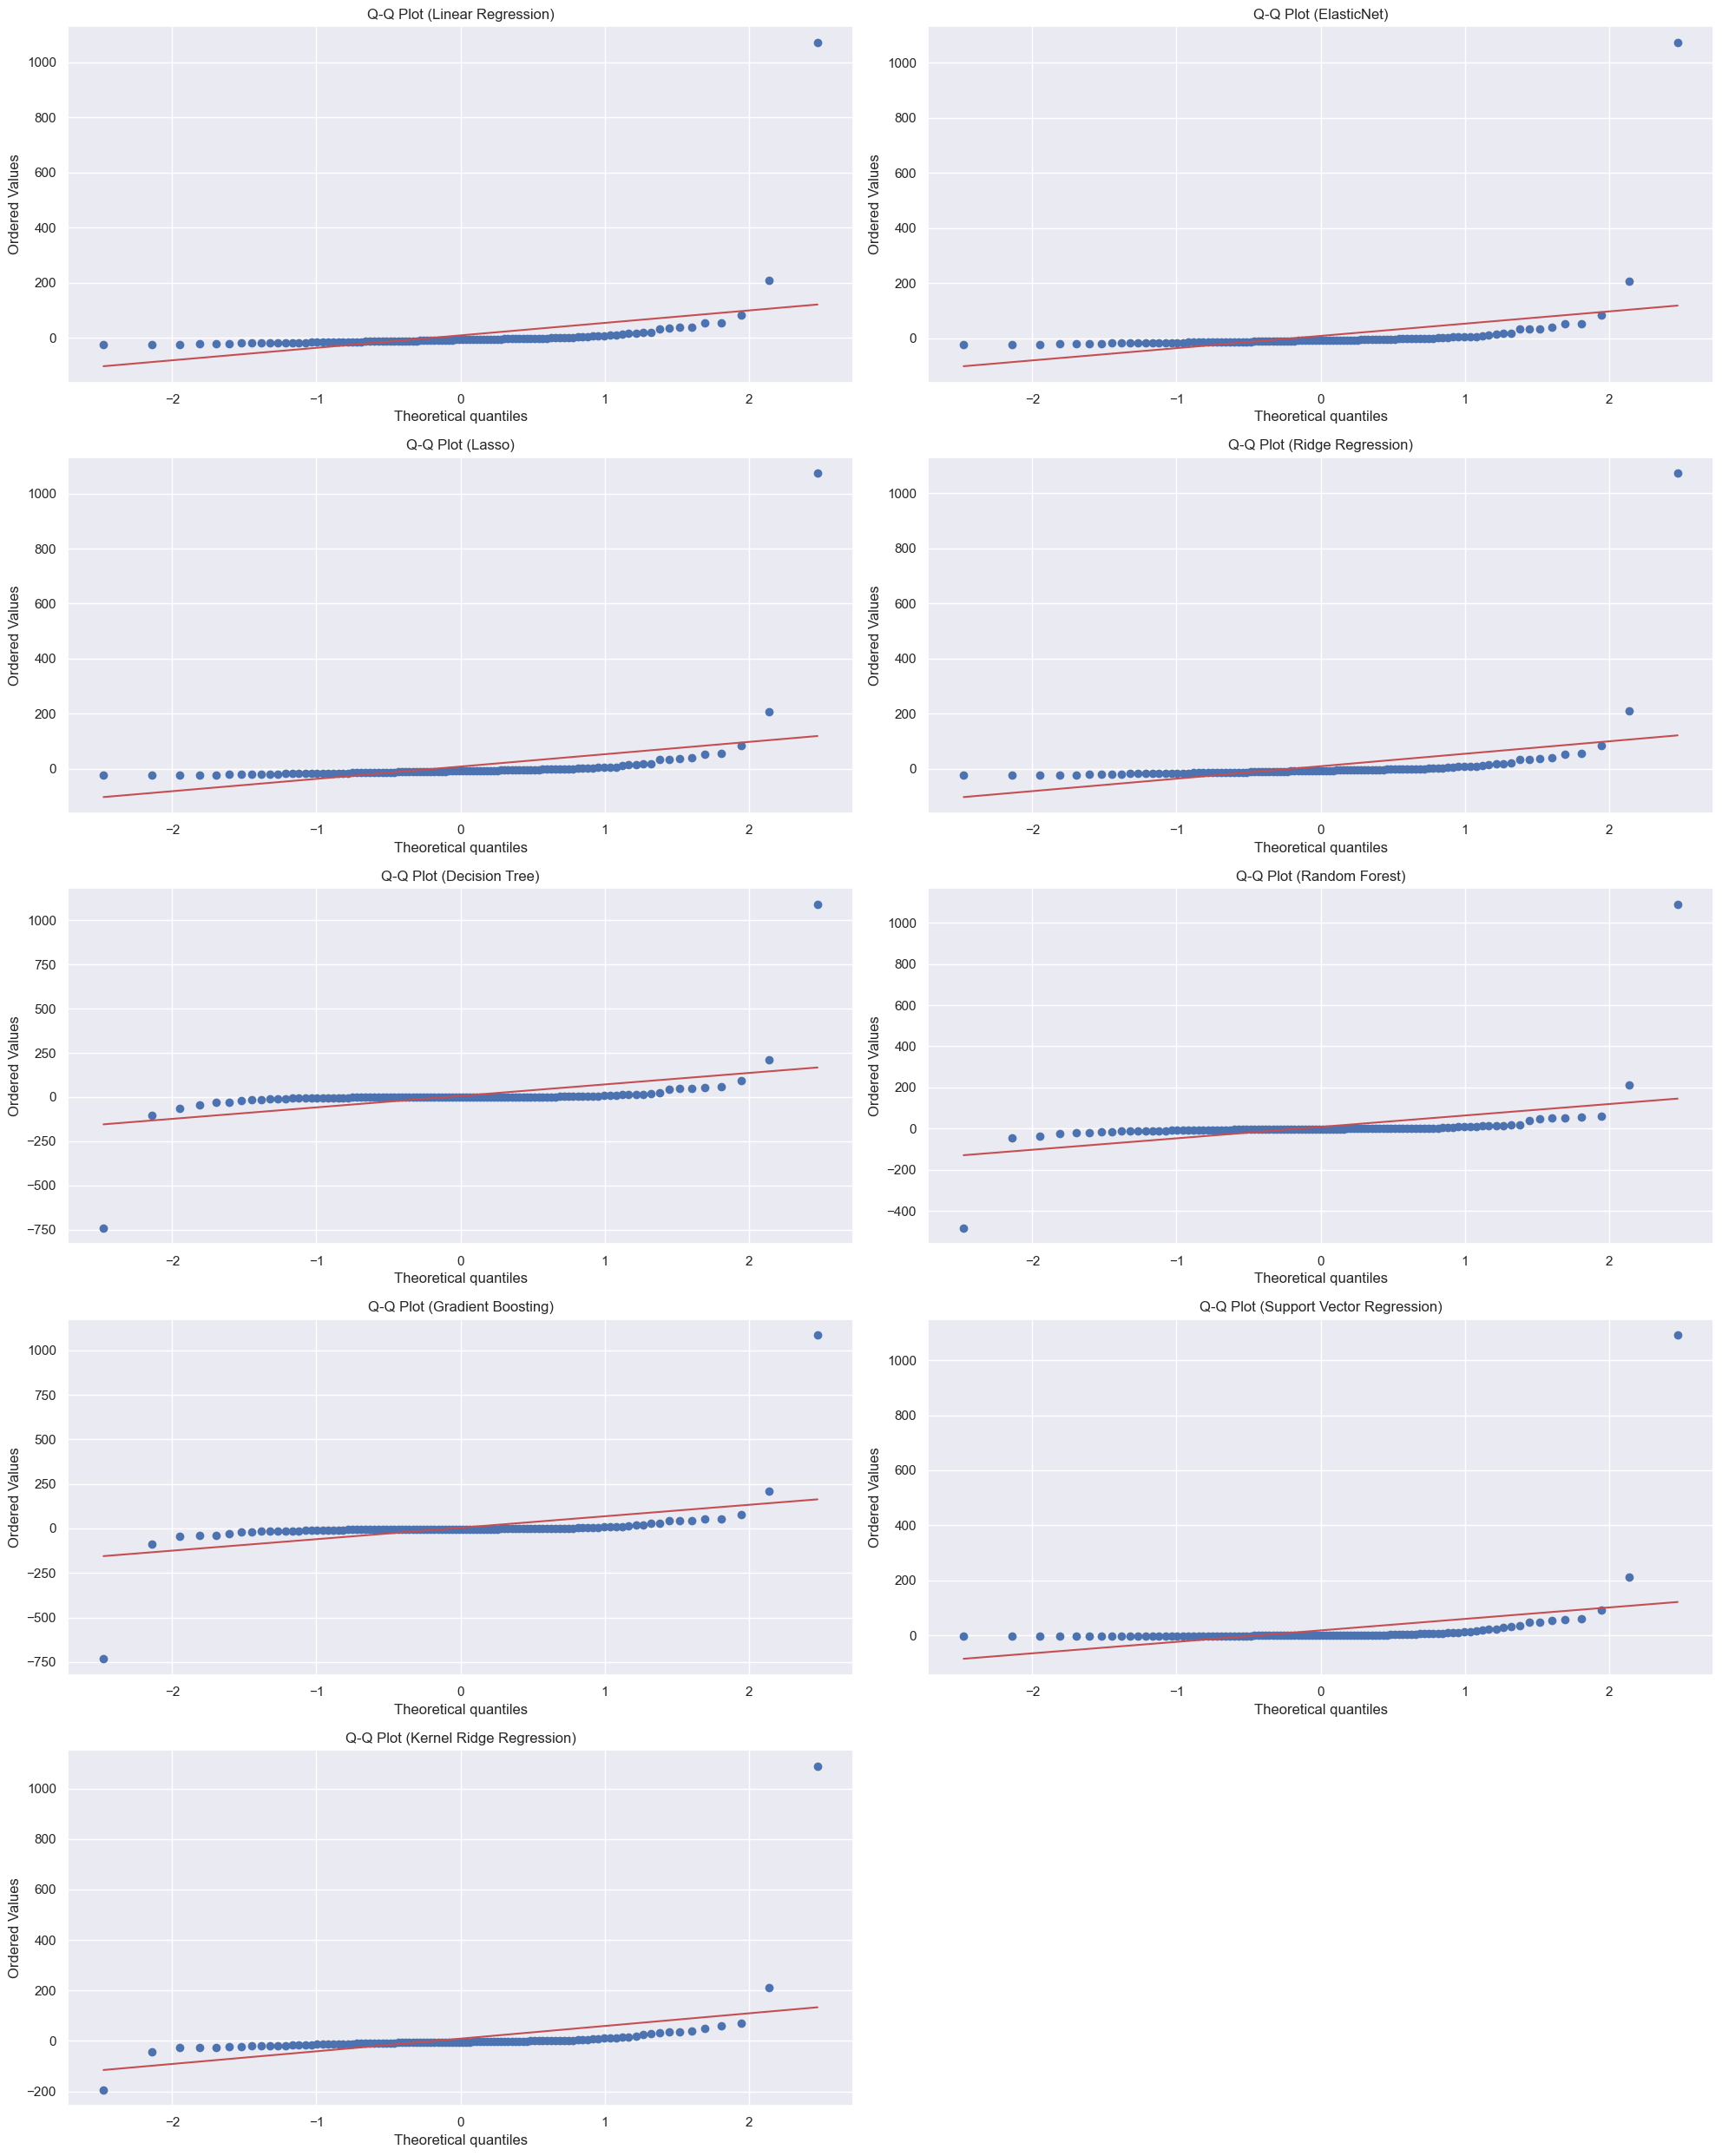

In [282]:
# Q-Q Plots for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot ({name})')

plt.tight_layout()
plt.show()


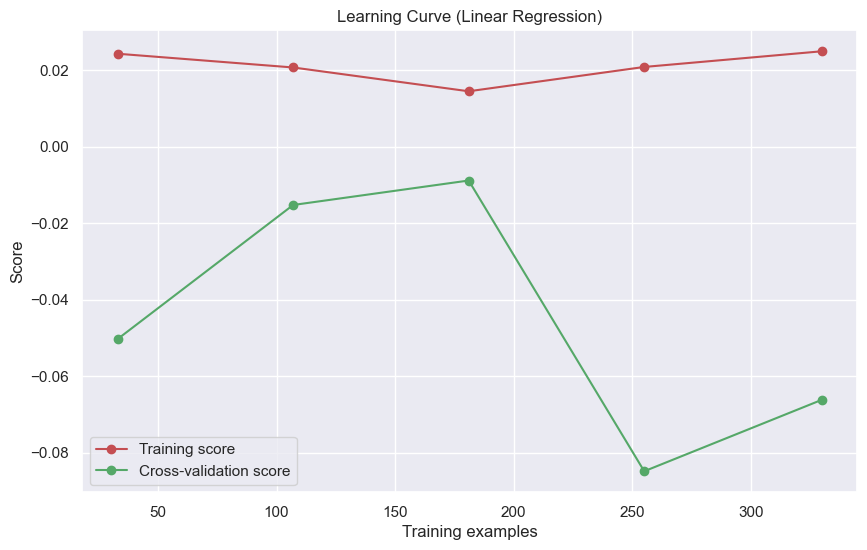

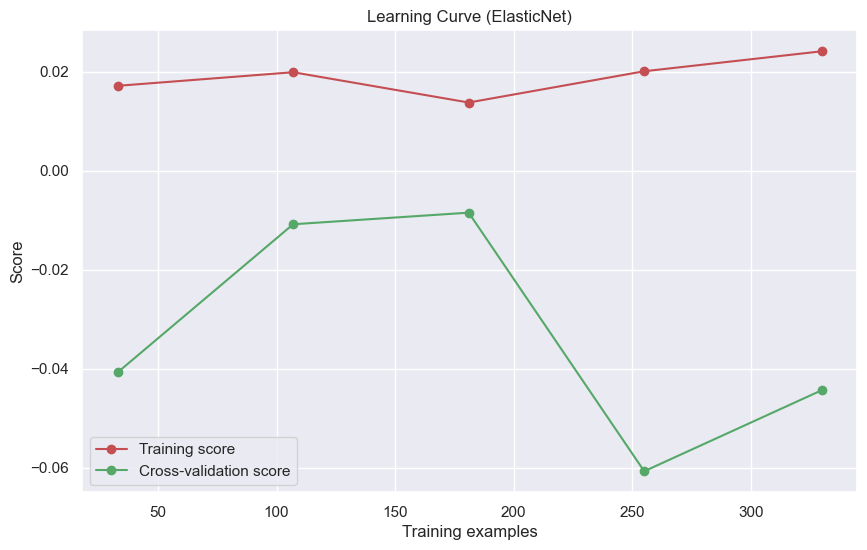

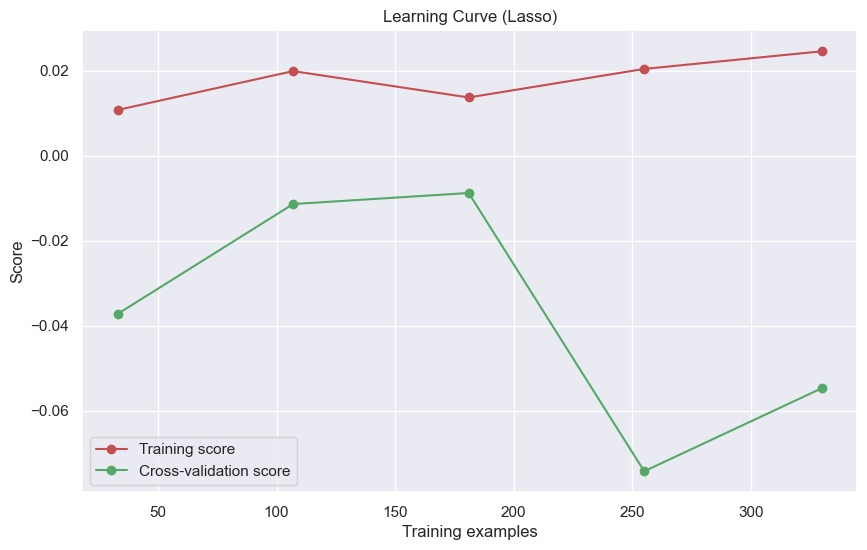

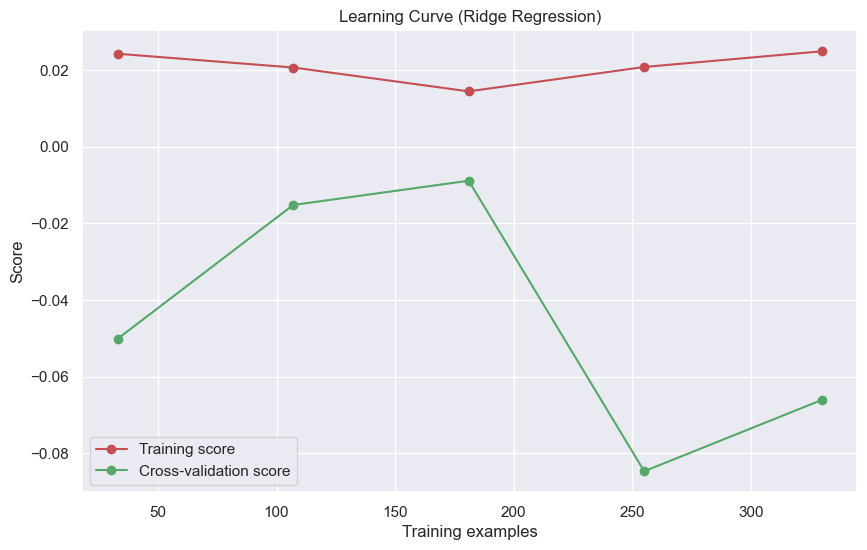

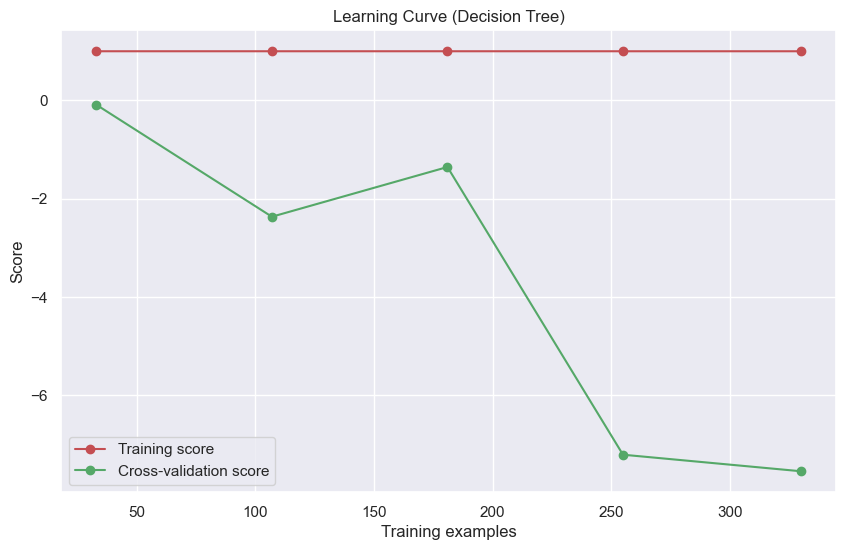

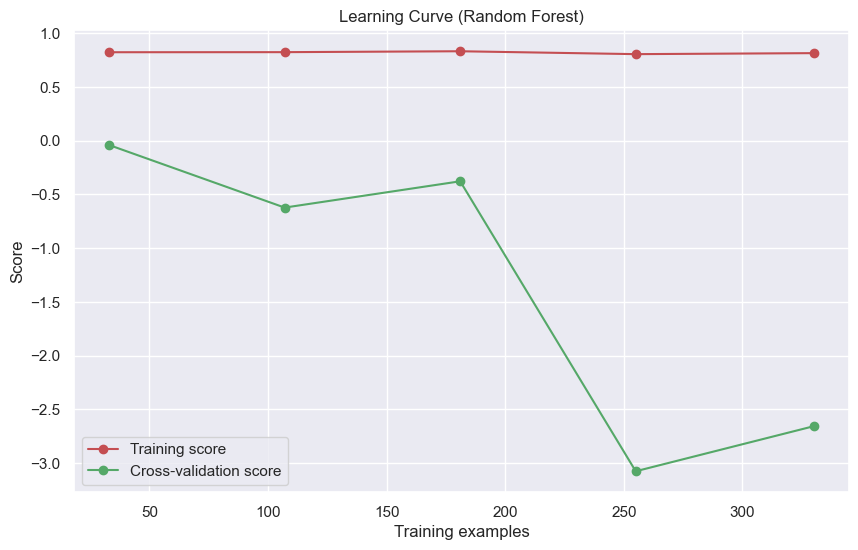

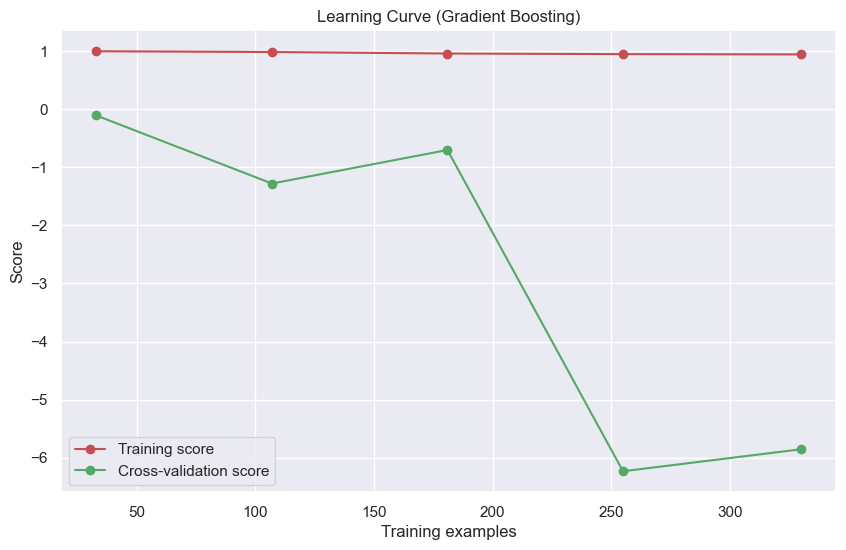

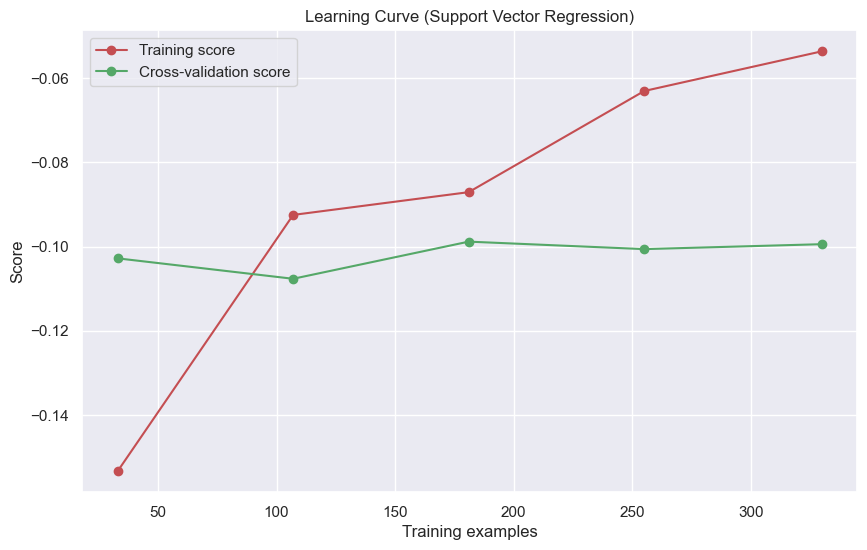

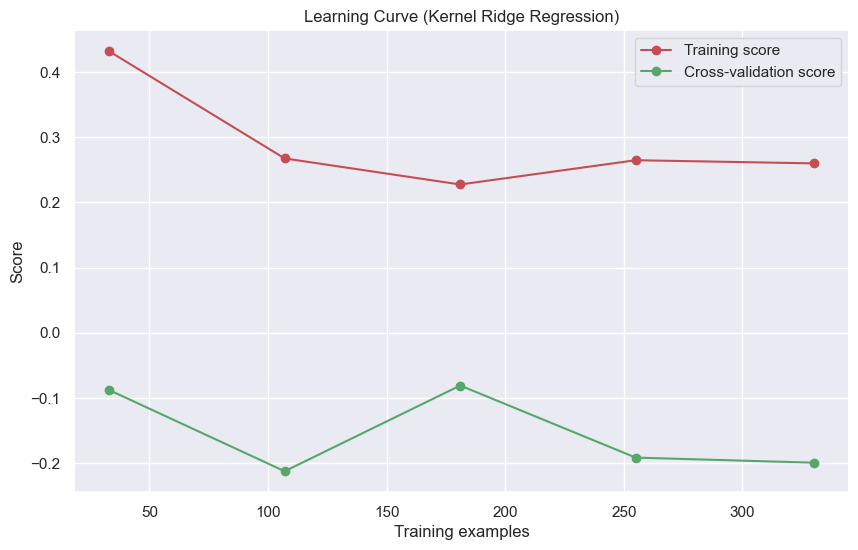

In [283]:
# Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

for name, model in models.items():
    plot_learning_curve(model, f'Learning Curve ({name})', X_train, y_train)


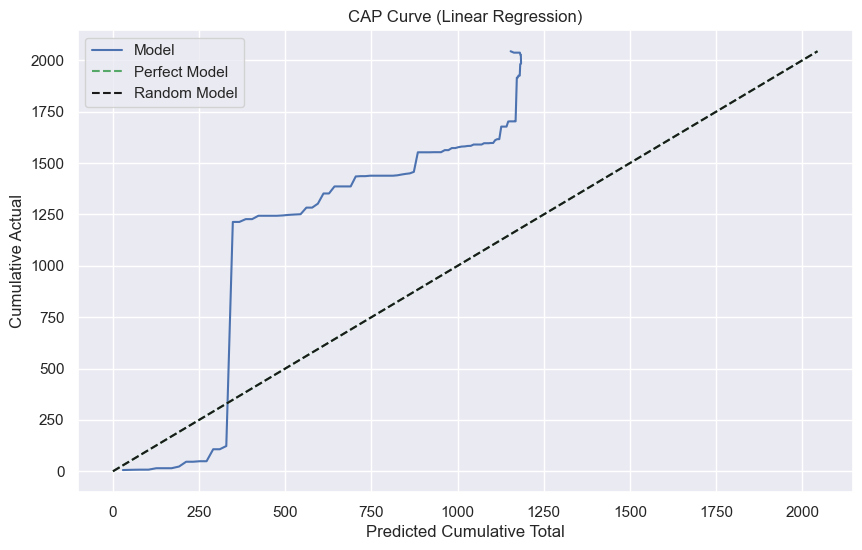

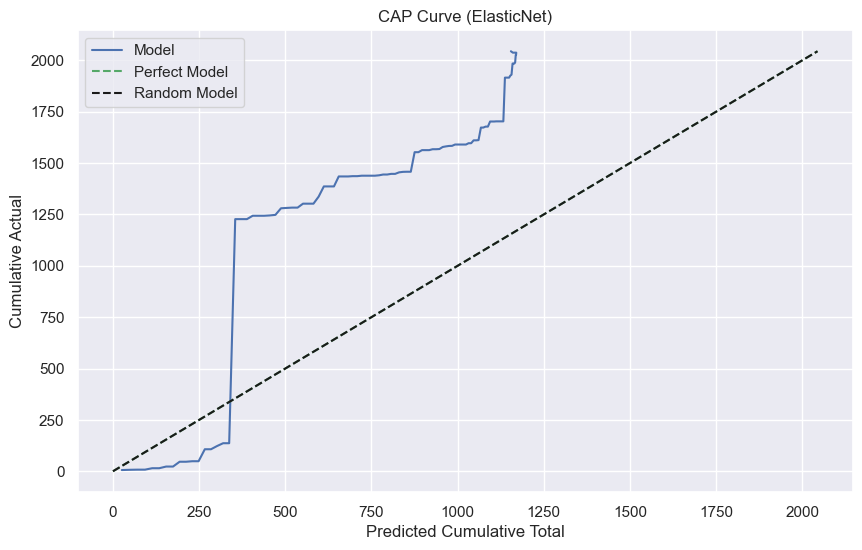

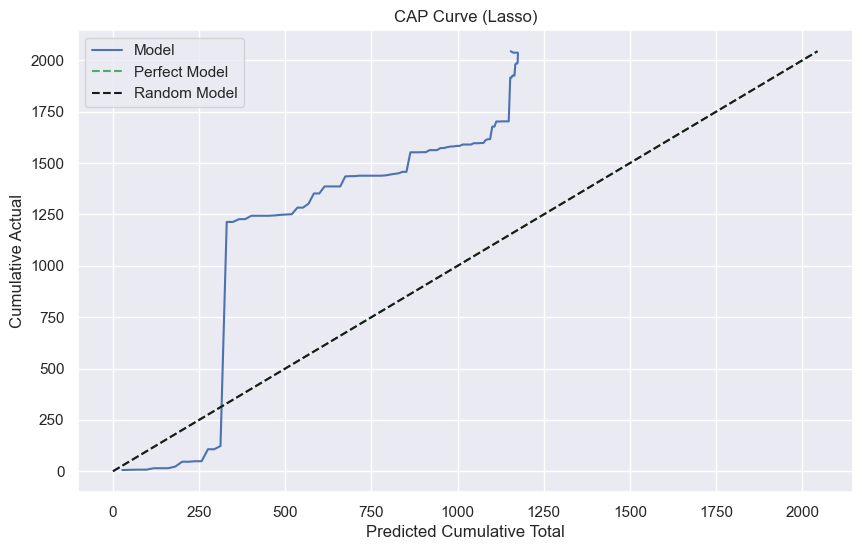

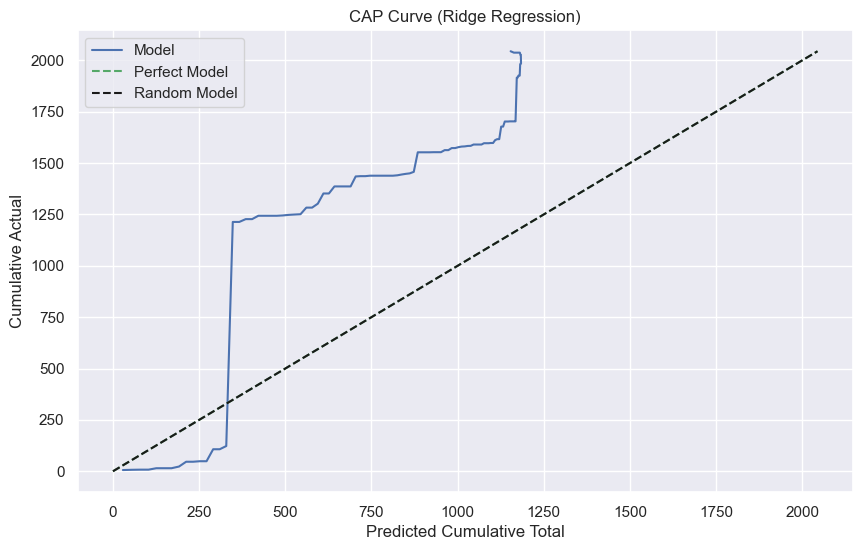

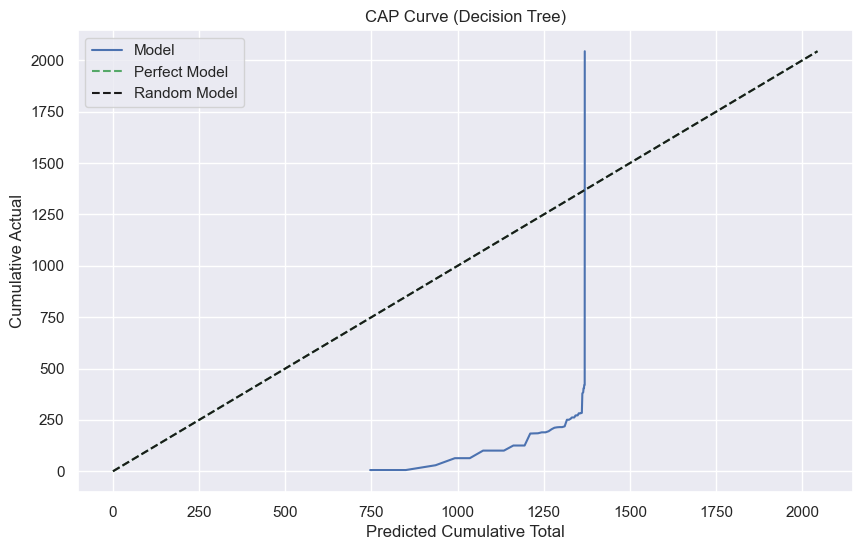

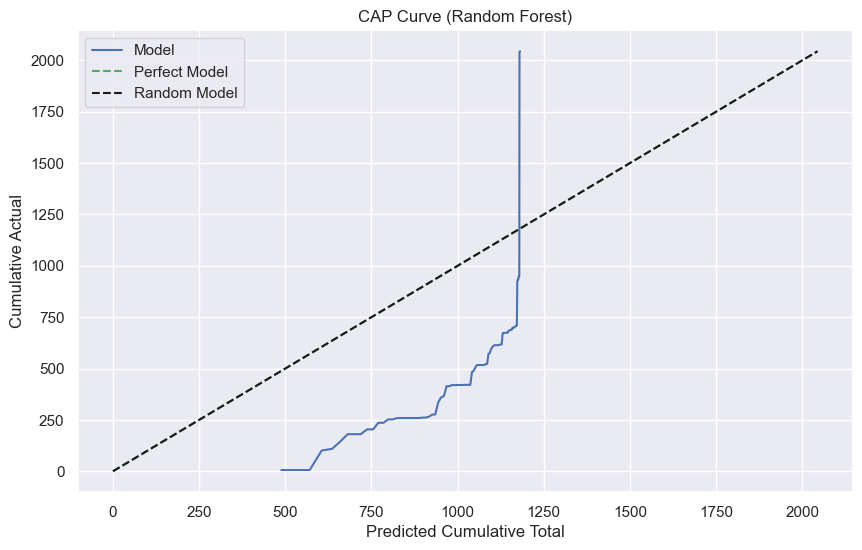

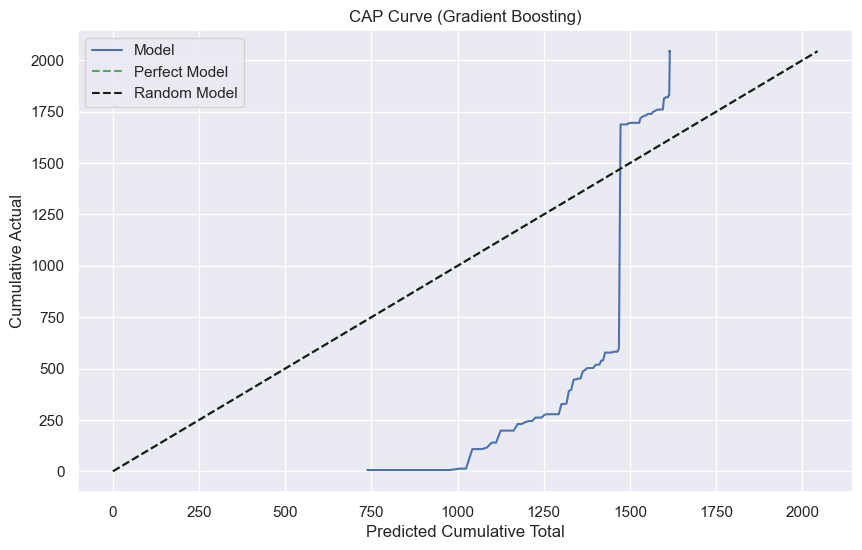

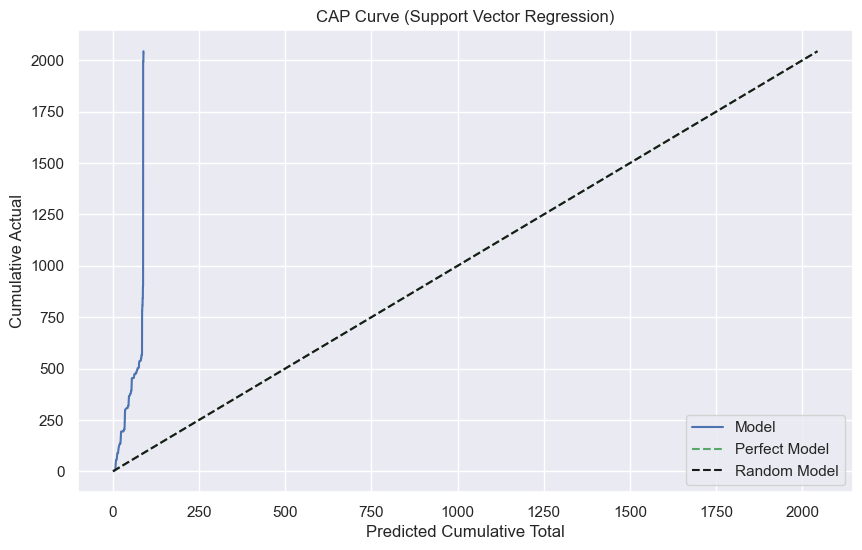

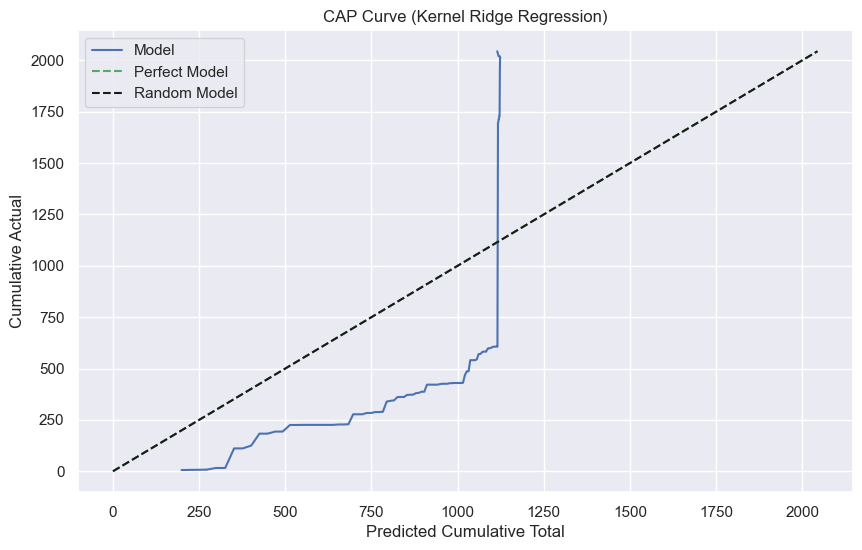

In [284]:
# Example for a single model; apply similarly for others.
from sklearn.metrics import roc_curve, roc_auc_score

def plot_cap(y_true, y_pred, title):
    y_true_sorted, y_pred_sorted = zip(*sorted(zip(y_true, y_pred), key=lambda x: x[1], reverse=True))
    cumtrue = np.cumsum(y_true_sorted)
    cumtotal = np.cumsum(y_pred_sorted)
    total = np.sum(y_true_sorted)
    perfect = np.linspace(0, total, len(y_true_sorted))
    random = np.linspace(0, total, len(y_true_sorted))

    plt.figure(figsize=(10, 6))
    plt.plot(cumtotal, cumtrue, 'b-', label='Model')
    plt.plot(perfect, perfect, 'g--', label='Perfect Model')
    plt.plot(random, random, 'k--', label='Random Model')
    plt.xlabel('Predicted Cumulative Total')
    plt.ylabel('Cumulative Actual')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

for name, y_pred in predictions.items():
    plot_cap(y_test, y_pred, f'CAP Curve ({name})')


Rough Regression Modelling for Raw Data

In [288]:
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('forestfires.csv')

# Create hybrid variables
data['temp_humidity_index'] = data['temp'] * (100 - data['RH'])
data['drought_severity_index'] = data['DMC'] + data['DC']
data['FWI'] = data['FFMC'] + data['DMC'] + data['DC'] + data['ISI']
data['wind_temp_index'] = data['wind'] * data['temp']

# Define the new feature set
features = ['temp_humidity_index', 'drought_severity_index', 'FWI', 'wind_temp_index', 'wind', 'rain']
X = data[features]
y = data['area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Kernel Ridge Regression': KernelRidge(kernel='rbf'),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate the models
predictions = {}
relative_errors = {}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    relative_errors[name] = (y_pred - y_test) / y_test
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)
'''

"\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, learning_curve\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.kernel_ridge import KernelRidge\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score\nimport xgboost as xgb\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport scipy.stats as stats\n\n# Load the dataset\ndata = pd.read_csv('forestfires.csv')\n\n# Create hybrid variables\ndata['temp_humidity_index'] = data['temp'] * (100 - data['RH'])\ndata['drought_severity_index'] = data['DMC'] + data['DC']\ndata['FWI'] = data['FFMC'] + data['DMC'] + data['DC'] + data['ISI']\ndata['wind_temp_index'] = data['wind'] * data['temp']\n\n# Define the new feature set\n

In [290]:
'''
# Relative Error vs. Index for all models

plt.figure(figsize=(20, 25))
for i, (name, rel_error) in enumerate(relative_errors.items(), 1):
    plt.subplot(5, 2, i)
    plt.scatter(range(len(rel_error)), rel_error, alpha=0.6)
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.xlabel('Index of Data')
    plt.ylabel('Relative Prediction Error')
    plt.title(f'Relative Error vs Index ({name})')

plt.tight_layout()
plt.show()
'''

"\n# Relative Error vs. Index for all models\n\nplt.figure(figsize=(20, 25))\nfor i, (name, rel_error) in enumerate(relative_errors.items(), 1):\n    plt.subplot(5, 2, i)\n    plt.scatter(range(len(rel_error)), rel_error, alpha=0.6)\n    plt.axhline(0, color='k', linestyle='--', lw=2)\n    plt.xlabel('Index of Data')\n    plt.ylabel('Relative Prediction Error')\n    plt.title(f'Relative Error vs Index ({name})')\n\nplt.tight_layout()\nplt.show()\n"

In [292]:
'''
# Residual Plots for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot ({name})')

plt.tight_layout()
plt.show()
'''

"\n# Residual Plots for all models\n\nplt.figure(figsize=(20, 25))\nfor i, (name, y_pred) in enumerate(predictions.items(), 1):\n    residuals = y_test - y_pred\n    plt.subplot(5, 2, i)\n    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)\n    plt.axhline(0, color='k', linestyle='--', lw=2)\n    plt.xlabel('Predicted Values')\n    plt.ylabel('Residuals')\n    plt.title(f'Residual Plot ({name})')\n\nplt.tight_layout()\nplt.show()\n"

In [294]:
'''
# Histogram of Residuals for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution ({name})')

plt.tight_layout()
plt.show()
'''

"\n# Histogram of Residuals for all models\n\nplt.figure(figsize=(20, 25))\nfor i, (name, y_pred) in enumerate(predictions.items(), 1):\n    residuals = y_test - y_pred\n    plt.subplot(5, 2, i)\n    sns.histplot(residuals, bins=30, kde=True)\n    plt.xlabel('Residuals')\n    plt.title(f'Residuals Distribution ({name})')\n\nplt.tight_layout()\nplt.show()\n"

In [296]:
'''
# Q-Q Plots for all models

plt.figure(figsize=(20, 25))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(5, 2, i)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot ({name})')

plt.tight_layout()
plt.show()
'''

'\n# Q-Q Plots for all models\n\nplt.figure(figsize=(20, 25))\nfor i, (name, y_pred) in enumerate(predictions.items(), 1):\n    residuals = y_test - y_pred\n    plt.subplot(5, 2, i)\n    stats.probplot(residuals, dist="norm", plot=plt)\n    plt.title(f\'Q-Q Plot ({name})\')\n\nplt.tight_layout()\nplt.show()\n'

In [298]:
'''
# Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

for name, model in models.items():
    plot_learning_curve(model, f'Learning Curve ({name})', X_train, y_train)
'''

"\n# Learning Curves\n\nfrom sklearn.model_selection import learning_curve\n\ndef plot_learning_curve(estimator, title, X, y):\n    plt.figure(figsize=(10, 6))\n    plt.title(title)\n    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')\n    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')\n    plt.xlabel('Training examples')\n    plt.ylabel('Score')\n    plt.legend(loc='best')\n    plt.show()\n\nfor name, model in models.items():\n    plot_learning_curve(model, f'Learning Curve ({name})', X_train, y_train)\n"

In [300]:
'''
# Example for a single model; apply similarly for others.
from sklearn.metrics import roc_curve, roc_auc_score

def plot_cap(y_true, y_pred, title):
    y_true_sorted, y_pred_sorted = zip(*sorted(zip(y_true, y_pred), key=lambda x: x[1], reverse=True))
    cumtrue = np.cumsum(y_true_sorted)
    cumtotal = np.cumsum(y_pred_sorted)
    total = np.sum(y_true_sorted)
    perfect = np.linspace(0, total, len(y_true_sorted))
    random = np.linspace(0, total, len(y_true_sorted))

    plt.figure(figsize=(10, 6))
    plt.plot(cumtotal, cumtrue, 'b-', label='Model')
    plt.plot(perfect, perfect, 'g--', label='Perfect Model')
    plt.plot(random, random, 'k--', label='Random Model')
    plt.xlabel('Predicted Cumulative Total')
    plt.ylabel('Cumulative Actual')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

for name, y_pred in predictions.items():
    plot_cap(y_test, y_pred, f'CAP Curve ({name})')
'''

"\n# Example for a single model; apply similarly for others.\nfrom sklearn.metrics import roc_curve, roc_auc_score\n\ndef plot_cap(y_true, y_pred, title):\n    y_true_sorted, y_pred_sorted = zip(*sorted(zip(y_true, y_pred), key=lambda x: x[1], reverse=True))\n    cumtrue = np.cumsum(y_true_sorted)\n    cumtotal = np.cumsum(y_pred_sorted)\n    total = np.sum(y_true_sorted)\n    perfect = np.linspace(0, total, len(y_true_sorted))\n    random = np.linspace(0, total, len(y_true_sorted))\n\n    plt.figure(figsize=(10, 6))\n    plt.plot(cumtotal, cumtrue, 'b-', label='Model')\n    plt.plot(perfect, perfect, 'g--', label='Perfect Model')\n    plt.plot(random, random, 'k--', label='Random Model')\n    plt.xlabel('Predicted Cumulative Total')\n    plt.ylabel('Cumulative Actual')\n    plt.title(title)\n    plt.legend(loc='best')\n    plt.show()\n\nfor name, y_pred in predictions.items():\n    plot_cap(y_test, y_pred, f'CAP Curve ({name})')\n"